# Connecting to drive and Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ls /content/gdrive

Mounted at /content/gdrive
MyDrive


In [ ]:
pip install factor_analyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 50.3 MB/s eta 0:00:00
  Created wheel for factor_analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=5f0f52b8c010414ab974b085d86b46ecb08a6de11297661d188999042cb92cbf
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor_analyzer


In [ ]:
pip install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=16dc2ecf2ea0de13dc97ac4ca5e4e9dcc07423e2b34a9a3ec65360ceba3ac284
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from IPython.display import Image

In [ ]:
import statsmodels.api as sm
from scipy.stats.mstats import winsorize
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from sklearn.decomposition import PCA
from sklearn.tree import export_graphviz
from sklearn import metrics, preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

# Dataset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Sem.5/RIDS/FB AD Campaign_Modify_Final.csv')
#df = pd.read_csv('/content/FB AD Campaign_Modify_Final.csv')
df.head()

,Campaign name,Month,Ad name,Platform,Reach,Frequency,Impressions,ThruPlays,Cost per ThruPlays,Amount spent (INR),Post engagement,Link clicks,Clicks (all),Video plays at 25%,Video plays at 50%,Video plays at 75%,Video plays at 100%,VTR
0,RoadSafety,Jan23,Prioritize correctly,FB,"39,22,941",1.21,"47,65,814","3,93,757",0.03,"1,00,000","40,31,892",14.0,227.0,"41,96,352","39,92,779","3,61,480","2,59,295",0.81
1,RoadSafety,Jan23,Prioritize correctly,IG,"52,19,321",1.45,"75,45,444","3,30,351",0.30,"1,00,000","7,91,485",3119.0,6994.0,"12,79,022","6,76,489","4,40,483","3,32,535",0.04
2,DIY GIFs,Jan23,It's now easier,FB,"16,06,657",1.31,"20,96,691","15,90,069",0.06,"1,00,000.00","17,55,954",9.0,110.0,"17,35,661","16,50,785","16,13,986","15,92,597",0.76
3,DIY GIFs,Jan23,It's now easier,IG,"28,91,774",1.74,"50,28,562","1,98,088",0.43,84579.30,"4,68,762",19.0,2281.0,"4,30,925","2,90,656","2,29,264","1,98,395",0.04
4,DIY GIFs,Jan23,With the IL TakeCare,IG,"24,77,565",1.42,"35,12,163","6,17,999",0.19,"1,15,000.00","10,85,188",3520.0,9469.0,"19,80,923","12,81,912","8,68,214","6,32,344",0.18


In [ ]:
df.shape

(133, 18)

In [ ]:
df.columns

Index(['Campaign name', 'Month', 'Ad name', 'Platform', 'Reach', 'Frequency',
       'Impressions', 'ThruPlays', 'Cost per ThruPlays', 'Amount spent (INR)',
       'Post engagement', 'Link clicks', 'Clicks (all)', 'Video plays at 25%',
       'Video plays at 50%', 'Video plays at 75%', 'Video plays at 100%',
       'VTR'],
      dtype='object')

In [ ]:
# Converting numbers into float type
cov_col = ['Reach','Impressions','ThruPlays','Amount spent (INR)','Post engagement','Video plays at 25%','Video plays at 50%','Video plays at 75%','Video plays at 100%']

for col in cov_col :
  df[col] = df[col].replace(',','',regex=True).astype(float)

df.head()

,Campaign name,Month,Ad name,Platform,Reach,Frequency,Impressions,ThruPlays,Cost per ThruPlays,Amount spent (INR),Post engagement,Link clicks,Clicks (all),Video plays at 25%,Video plays at 50%,Video plays at 75%,Video plays at 100%,VTR
0,RoadSafety,Jan23,Prioritize correctly,FB,3922941.0,1.21,4765814.0,393757.0,0.03,100000.0,4031892.0,14.0,227.0,4196352.0,3992779.0,361480.0,259295.0,0.81
1,RoadSafety,Jan23,Prioritize correctly,IG,5219321.0,1.45,7545444.0,330351.0,0.30,100000.0,791485.0,3119.0,6994.0,1279022.0,676489.0,440483.0,332535.0,0.04
2,DIY GIFs,Jan23,It's now easier,FB,1606657.0,1.31,2096691.0,1590069.0,0.06,100000.0,1755954.0,9.0,110.0,1735661.0,1650785.0,1613986.0,1592597.0,0.76
3,DIY GIFs,Jan23,It's now easier,IG,2891774.0,1.74,5028562.0,198088.0,0.43,84579.3,468762.0,19.0,2281.0,430925.0,290656.0,229264.0,198395.0,0.04
4,DIY GIFs,Jan23,With the IL TakeCare,IG,2477565.0,1.42,3512163.0,617999.0,0.19,115000.0,1085188.0,3520.0,9469.0,1980923.0,1281912.0,868214.0,632344.0,0.18


# EDA

### Converting Post engagement into binary

In [ ]:
# Mean of Post engagement column
mean = df['Post engagement'].mean()
mean

1139494.1954887218

In [ ]:
# Labeling
cat = []
for i in df['Post engagement']:
  if i < mean:
    cat.append('Less than mean')
  else:
    cat.append('More than mean')

df['Post engagement (categorical)'] = cat

In [ ]:
# Converting to binary data
df_one = pd.get_dummies(df['Post engagement (categorical)'])
df_one = df_one.drop(['Less than mean'], axis=1)

In [ ]:
# Combinig two dataframe
df_two = df.join(df_one)
df_two = df_two.drop(['Post engagement','Post engagement (categorical)'], axis = 1)
df_two.rename(columns = {'More than mean':'Post engagement'}, inplace = True)
df_two.head()

,Campaign name,Month,Ad name,Platform,Reach,Frequency,Impressions,ThruPlays,Cost per ThruPlays,Amount spent (INR),Link clicks,Clicks (all),Video plays at 25%,Video plays at 50%,Video plays at 75%,Video plays at 100%,VTR,Post engagement
0,RoadSafety,Jan23,Prioritize correctly,FB,3922941.0,1.21,4765814.0,393757.0,0.03,100000.0,14.0,227.0,4196352.0,3992779.0,361480.0,259295.0,0.81,1
1,RoadSafety,Jan23,Prioritize correctly,IG,5219321.0,1.45,7545444.0,330351.0,0.30,100000.0,3119.0,6994.0,1279022.0,676489.0,440483.0,332535.0,0.04,0
2,DIY GIFs,Jan23,It's now easier,FB,1606657.0,1.31,2096691.0,1590069.0,0.06,100000.0,9.0,110.0,1735661.0,1650785.0,1613986.0,1592597.0,0.76,1
3,DIY GIFs,Jan23,It's now easier,IG,2891774.0,1.74,5028562.0,198088.0,0.43,84579.3,19.0,2281.0,430925.0,290656.0,229264.0,198395.0,0.04,0
4,DIY GIFs,Jan23,With the IL TakeCare,IG,2477565.0,1.42,3512163.0,617999.0,0.19,115000.0,3520.0,9469.0,1980923.0,1281912.0,868214.0,632344.0,0.18,0


In [ ]:
# Converting Platform to binary
df_two['Platform'] = df_two['Platform'].apply(lambda x: 1 if x.strip()=='FB' else 0)

### Box plots

<Axes: >

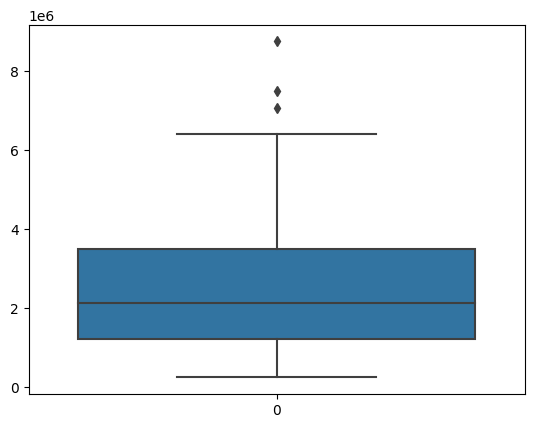

In [ ]:
# Box plot for Reach
sns.boxplot(df_two['Reach'])

<Axes: >

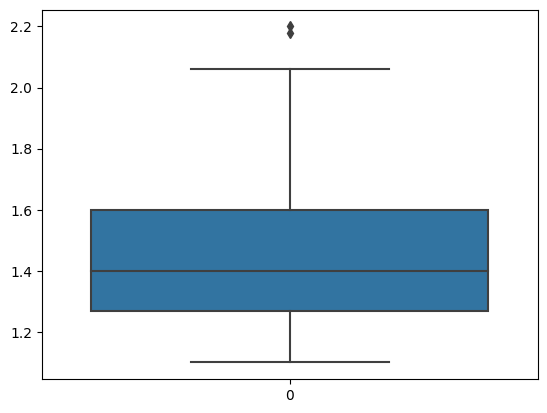

In [ ]:
# Box plot for Frequency
sns.boxplot(df_two['Frequency'])

<Axes: >

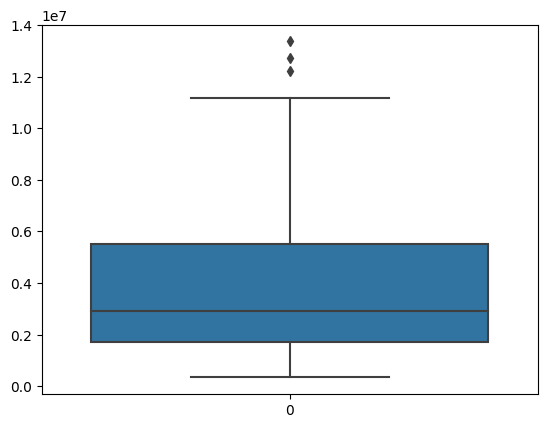

In [ ]:
# Box plot for Impressions
sns.boxplot(df_two['Impressions'])

<Axes: >

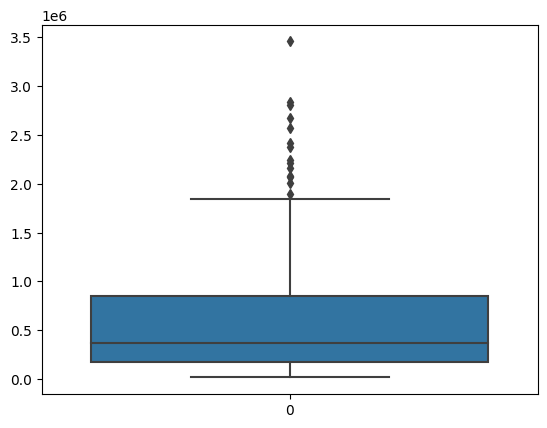

In [ ]:
# Box plot for ThruPlays
sns.boxplot(df_two['ThruPlays'])

<Axes: >

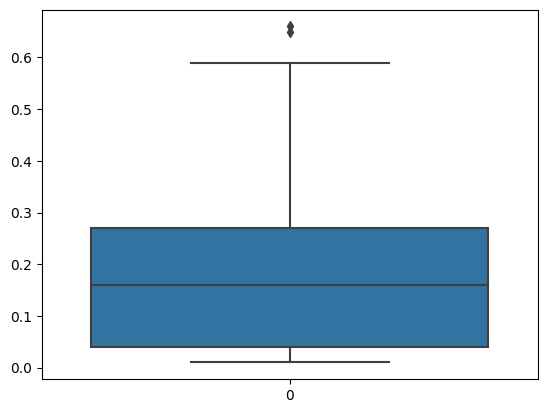

In [ ]:
# Box plot for Cost per ThruPlays
sns.boxplot(df_two['Cost per ThruPlays'])

<Axes: >

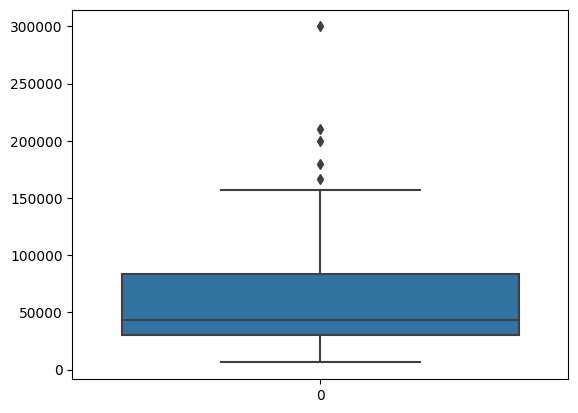

In [ ]:
# Box plot for Amount spent (INR)
sns.boxplot(df_two['Amount spent (INR)'])

<Axes: >

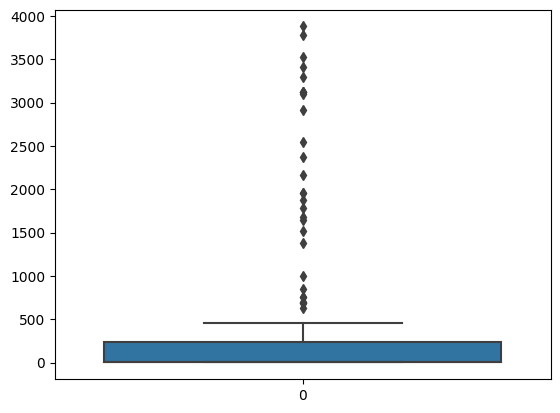

In [ ]:
# Box plot for Link clicks
sns.boxplot(df_two['Link clicks'])

<Axes: >

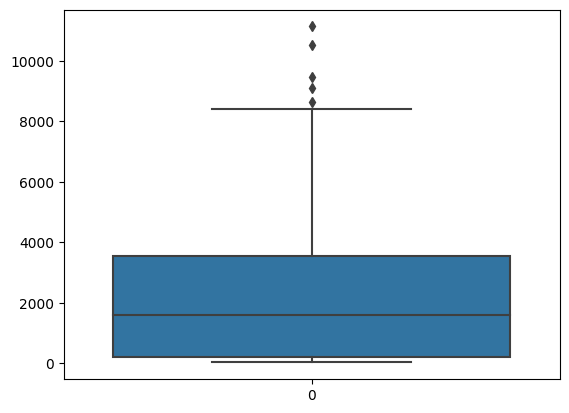

In [ ]:
# Box plot for Clicks (all)
sns.boxplot(df_two['Clicks (all)'])

<Axes: >

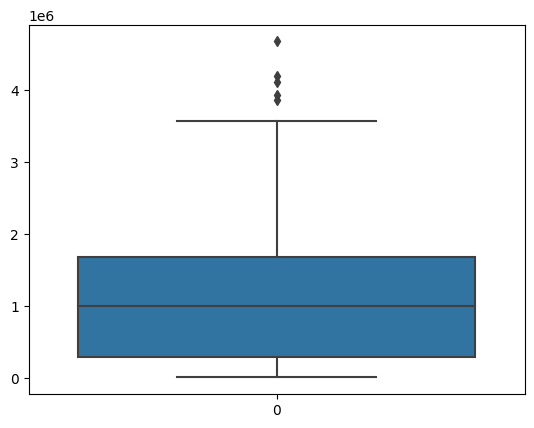

In [ ]:
# Box plot for Video plays at 25%
sns.boxplot(df_two['Video plays at 25%'])

<Axes: >

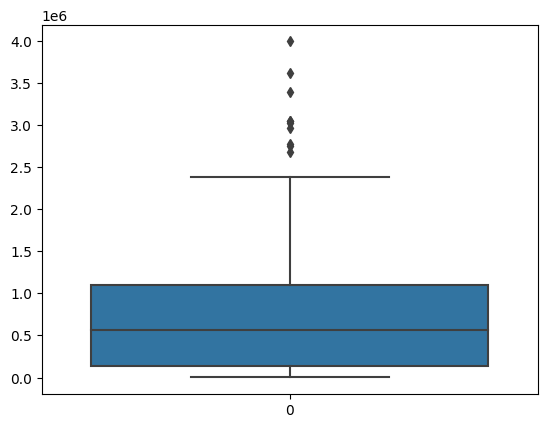

In [ ]:
# Box plot for Video plays at 50%
sns.boxplot(df_two['Video plays at 50%'])

<Axes: >

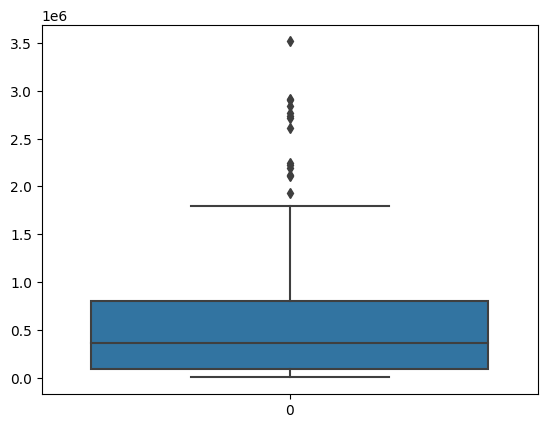

In [ ]:
# Box plot for Video plays at 75%
sns.boxplot(df_two['Video plays at 75%'])

<Axes: >

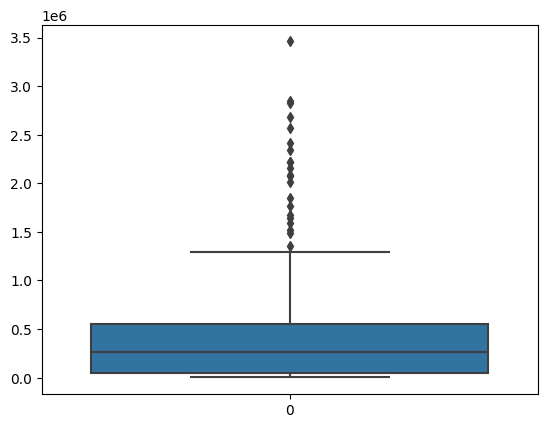

In [ ]:
# Box plot for Video plays at 100%
sns.boxplot(df_two['Video plays at 100%'])

<Axes: >

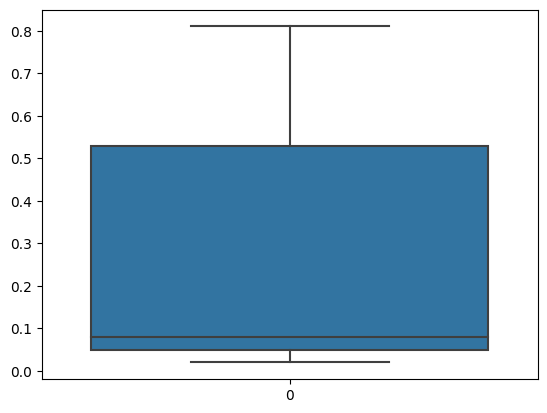

In [ ]:
# Box plot for VTR
sns.boxplot(df_two['VTR'])

### Treating outlier

In [ ]:
# Number of outliers in each column
Q1 = df_two.quantile(0.25)
Q3 = df_two.quantile(0.75)
IQR = Q3 - Q1
print(((df_two < (Q1 - 1.5 * IQR)) | (df_two > (Q3 + 1.5 * IQR))).sum())

Ad name                 0
Amount spent (INR)      5
Campaign name           0
Clicks (all)            5
Cost per ThruPlays      2
Frequency               2
Impressions             3
Link clicks            29
Month                   0
Platform                0
Post engagement         0
Reach                   3
ThruPlays              14
VTR                     0
Video plays at 100%    21
Video plays at 25%      5
Video plays at 50%     10
Video plays at 75%     14
dtype: int64


<ipython-input-32-d9d6b5892d73>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df_two.quantile(0.25)
<ipython-input-32-d9d6b5892d73>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df_two.quantile(0.75)
<ipython-input-32-d9d6b5892d73>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(((df_two < (Q1 - 1.5 * IQR)) | (df_two > (Q3 + 1.5 * IQR))).sum())


In [ ]:
# Removing the first 3 coulmns
columns = list(df_two.columns)
del columns[:3]

In [ ]:
# Winsorizing the outlier
for col in columns:
  df_two[col] = winsorize(df_two[col], limits=[0.1, 0.3])

In [ ]:
# Value count of target variable
freq = df_two['Post engagement'].value_counts()
print(freq)
print((freq / (freq.sum()))*100)

0    85
1    48
Name: Post engagement, dtype: int64
0    63.909774
1    36.090226
Name: Post engagement, dtype: float64


<Axes: >

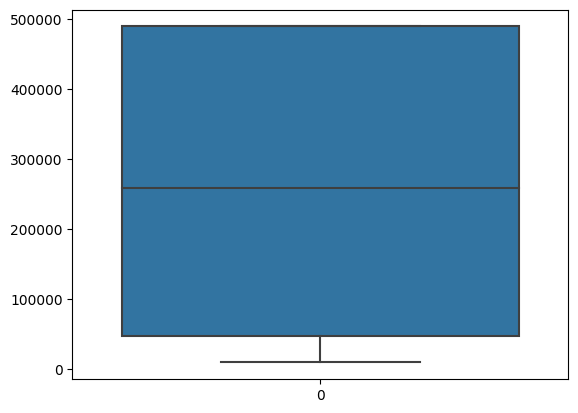

In [ ]:
# Box plot for Video plays at 100% after winsoriztion
sns.boxplot(df_two['Video plays at 100%'])

### Splitting dataset

In [ ]:
# Select feature set and target column
X = df_two.drop(['Campaign name','Month','Ad name','Post engagement'], axis = 1)
y = df_two['Post engagement']

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                feature         VIF
0              Platform   10.525453
1                 Reach  203.295792
2             Frequency   81.003125
3           Impressions  200.657049
4             ThruPlays   34.826841
5    Cost per ThruPlays   32.466134
6    Amount spent (INR)   35.165640
7           Link clicks    2.902710
8          Clicks (all)    9.335110
9    Video plays at 25%   35.037151
10   Video plays at 50%  195.998861
11   Video plays at 75%  246.276363
12  Video plays at 100%   44.759235
13                  VTR   26.685877


In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=238736)

# Logistics Regression

### Logistic Regressin using sklearn

In [ ]:
# Build the logistic regression model
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

Accuracy: 0.9259259259259259
Confusion Matrix:
 [[18  0]
 [ 2  7]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.78      0.88         9

    accuracy                           0.93        27
   macro avg       0.95      0.89      0.91        27
weighted avg       0.93      0.93      0.92        27



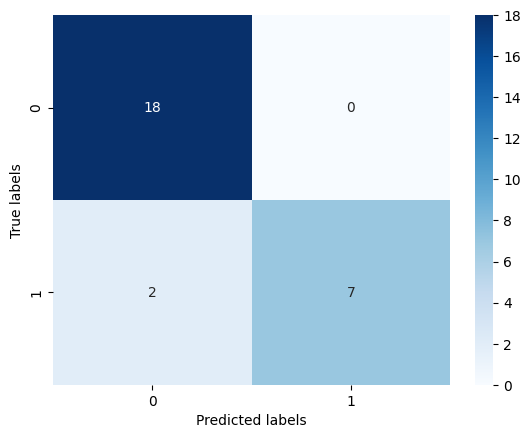

In [ ]:
# Evaluate the model using accuracy, confusion matrix, and classification report
y_pred = lr.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
cm_nb = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
# Compute ROC curve and ROC area for each class
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"AUC: {roc_auc}")

AUC: 0.9382716049382716


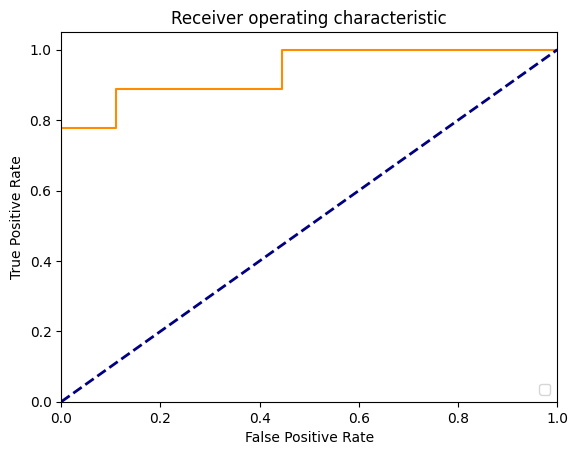

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr,tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Logistic Regression using statsmodel

In [ ]:
# Building the model and fitting the data
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 9


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


In [ ]:
# Printing the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:        Post engagement   No. Observations:                  106
Model:                          Logit   Df Residuals:                       92
Method:                           MLE   Df Model:                           13
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                     inf
Time:                        08:44:15   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Platform                2.7194      2.174      1.251      0.211      -1.542       6.981
Reach               -1.111e-06   2.43e-06     -0.457      0.648   -5.88e-06    3.66e-06
Frequency       

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
# performing predictions on the test dataset
yhat = log_reg.predict(X_test)
prediction = list(map(round, yhat))

Confusion Matrix : 
 [[17  1]
 [ 1  8]]


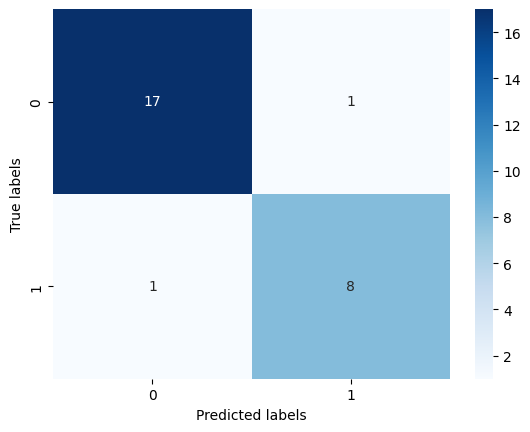

Test accuracy =  0.9259259259259259


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, prediction)
print("Confusion Matrix : \n", cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction))

In [ ]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = metrics.roc_curve(y_test, yhat)
roc_auc = roc_auc_score(y_test, yhat)

print(f"AUC: {roc_auc}")

AUC: 0.9691358024691359


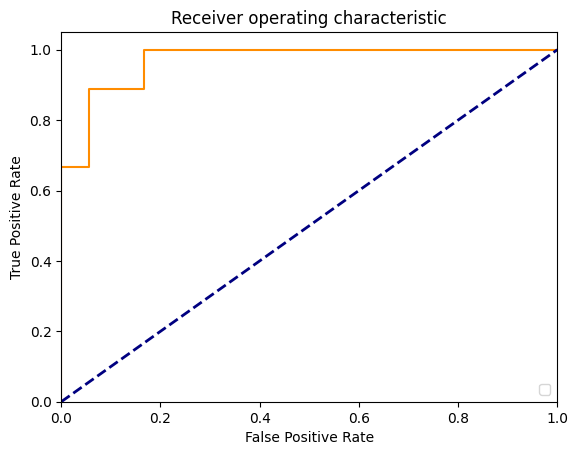

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr,tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# PCA + Logistics Regression

### PCA

In [ ]:
X = df_two.drop(['Campaign name','Month','Ad name','Post engagement'], axis = 1)
X.head()

,Platform,Reach,Frequency,Impressions,ThruPlays,Cost per ThruPlays,Amount spent (INR),Link clicks,Clicks (all),Video plays at 25%,Video plays at 50%,Video plays at 75%,Video plays at 100%,VTR
0,1,3164678.0,1.21,4765814.0,393757.0,0.03,75000.0,14.0,227.0,1562467.0,972235.0,361480.0,259295.0,0.45
1,0,3164678.0,1.45,4980749.0,330351.0,0.25,75000.0,45.0,3343.0,1279022.0,676489.0,440483.0,332535.0,0.04
2,1,1606657.0,1.31,2096691.0,617999.0,0.06,75000.0,9.0,110.0,1562467.0,972235.0,690579.0,489708.0,0.45
3,0,2891774.0,1.53,4980749.0,198088.0,0.25,75000.0,19.0,2281.0,430925.0,290656.0,229264.0,198395.0,0.04
4,0,2477565.0,1.42,3512163.0,617999.0,0.19,75000.0,45.0,3343.0,1562467.0,972235.0,690579.0,489708.0,0.18


In [ ]:
# Mean
X_mean = X.mean()

# Standard deviation
X_std = X.std()

# Standardization
Z = (X - X_mean) / X_std

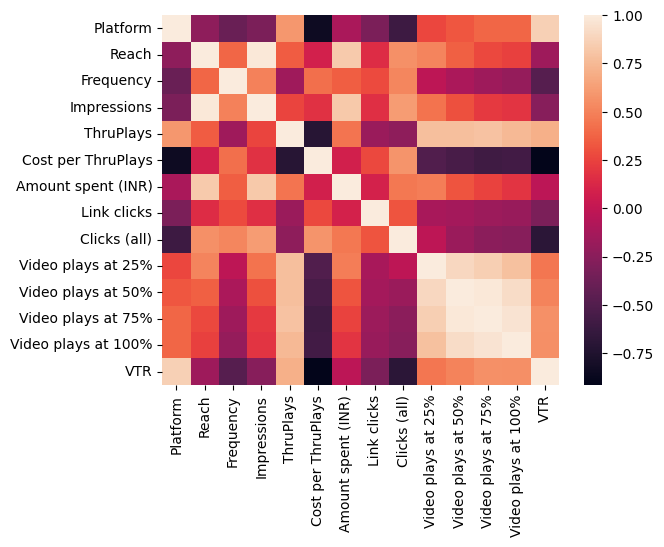

In [ ]:
# Covariance
c = Z.cov()

# Plot the covariance matrix
sns.heatmap(c)
plt.show()

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(c)
print('Eigen values:\n', eigenvalues)
print('Eigen values Shape:', eigenvalues.shape)
print('Eigen Vector Shape:', eigenvectors.shape)

Eigen values:
 [6.18394324 4.27781851 1.01068108 0.86637742 0.59565578 0.32375697
 0.25418741 0.1818117  0.11030918 0.09254218 0.05392287 0.032208
 0.00653986 0.01024581]
Eigen values Shape: (14,)
Eigen Vector Shape: (14, 14)


In [ ]:
# Index the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]

# Sort the eigenvalues in descending order
eigenvalues = eigenvalues[idx]

# sort the corresponding eigenvectors accordingly
eigenvectors = eigenvectors[:,idx]

In [ ]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
explained_var

array([0.44171023, 0.7472687 , 0.8194602 , 0.8813443 , 0.92389115,
       0.94701664, 0.96517289, 0.97815944, 0.98603866, 0.99264882,
       0.99650045, 0.99880102, 0.99953287, 1.        ])

In [ ]:
n_components = np.argmax(explained_var >= 0.90) + 1
n_components

5

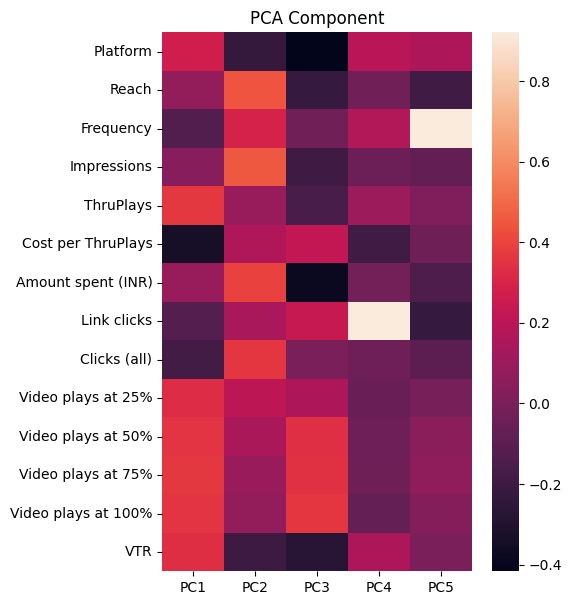

In [ ]:
# PCA component or unit matrix
u = eigenvectors[:,:n_components]
pca_component = pd.DataFrame(u, index = X.columns, columns = ['PC1','PC2','PC3','PC4','PC5'])

# plotting heatmap
plt.figure(figsize =(5, 7))
sns.heatmap(pca_component)
plt.title('PCA Component')
plt.show()

In [ ]:
# Matrix multiplication or dot Product
Z_pca = Z @ pca_component
# Rename the columns name
Z_pca.rename({'PC1': 'PCA1', 'PC2': 'PCA2', 'PC3': 'PCA3', 'PC4': 'PCA4', 'PC5': 'PCA5'}, axis=1, inplace=True)
# Print the  Pricipal Component values
print(Z_pca)

         PCA1      PCA2      PCA3      PCA4      PCA5
0    2.643309  0.275591 -1.470896 -0.056463 -1.242363
1   -0.601103  3.054481  0.779514  0.647371 -0.587949
2    3.551712 -0.668373 -0.134587 -0.139044  0.079553
3   -2.001164  1.973087 -0.534444 -0.466142  0.331036
4    1.380345  2.499880  1.508850  0.902386 -0.437357
..        ...       ...       ...       ...       ...
128 -3.103038 -3.040968  0.662552 -0.907454 -1.006747
129  3.340360  1.255923 -0.278502  1.765589 -0.413090
130  0.717083  3.652133  1.558439  0.701263  0.105502
131 -0.475746  2.126510 -1.066906  1.461121  0.323287
132 -2.752384  1.857156 -1.700999 -0.762566 -0.361333

[133 rows x 5 columns]


In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = Z_pca.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(Z_pca.values, i)
                          for i in range(len(Z_pca.columns))]

print(vif_data)

  feature  VIF
0    PCA1  1.0
1    PCA2  1.0
2    PCA3  1.0
3    PCA4  1.0
4    PCA5  1.0


### PCA with sklearn

In [ ]:
# Select feature set and target column
X = df_two.drop(['Campaign name','Month','Ad name','Post engagement'], axis = 1)
y = df_two['Post engagement']

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the Data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Apply PCA to the Data
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

### Logistics Regression after PCA using sklearn

In [ ]:
# Build the logistic regression model
lr = LogisticRegression(random_state=42)
lr.fit(X_train_pca, y_train)

LogisticRegression(random_state=42)

Accuracy: 0.9259259259259259
Confusion Matrix:
 [[17  1]
 [ 1  8]]


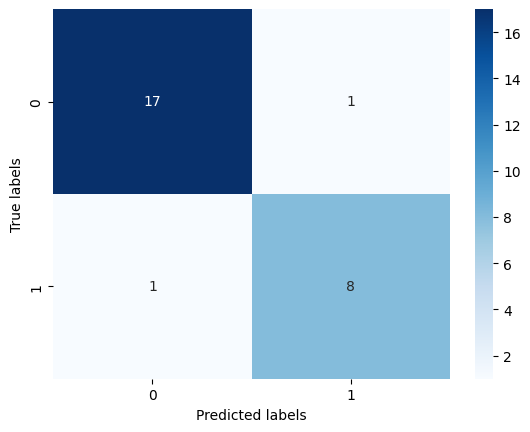

In [ ]:
# Evaluate the model using accuracy, confusion matrix, and classification report
y_pred = lr.predict(X_test_pca)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
cm_nb = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
# Classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.89      0.89      0.89         9

    accuracy                           0.93        27
   macro avg       0.92      0.92      0.92        27
weighted avg       0.93      0.93      0.93        27



In [ ]:
# Compute ROC curve and ROC area for each class
y_pred_proba = lr.predict_proba(X_test_pca)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"AUC: {roc_auc}")

AUC: 0.9444444444444444


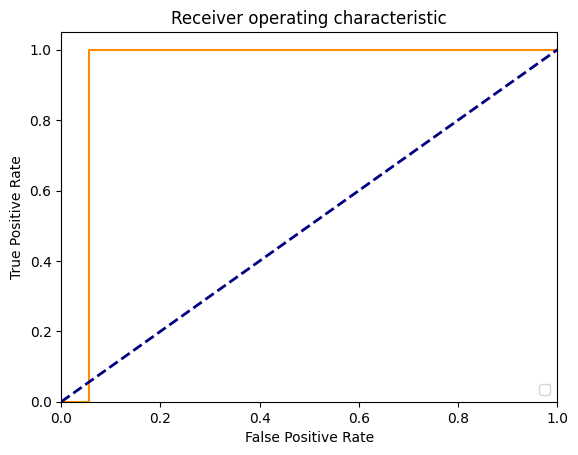

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr,tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Logistics Regression after PCA using statsmodels

In [ ]:
# Building the model and fitting the data
log_reg_pca = sm.Logit(y_train, X_train_pca).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 8


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


In [ ]:
# Printing the summary table
print(log_reg_pca.summary())

                           Logit Regression Results                           
Dep. Variable:        Post engagement   No. Observations:                  106
Model:                          Logit   Df Residuals:                      101
Method:                           MLE   Df Model:                            4
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                     inf
Time:                        08:44:26   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.0441      0.241      4.330      0.000       0.571       1.517
x2            -0.4578      0.143     -3.199      0.001      -0.738      -0.177
x3             2.0043      0.533      3.762      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [ ]:
# performing predictions on the test dataset
yhat_pca = log_reg_pca.predict(X_test_pca)
prediction_pca = list(map(round, yhat_pca))

Confusion Matrix : 
 [[13  5]
 [ 0  9]]


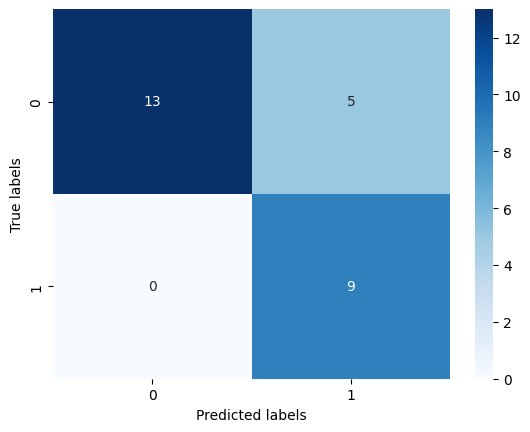

Test accuracy =  0.8148148148148148


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, prediction_pca)
print("Confusion Matrix : \n", cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction_pca))

In [ ]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = metrics.roc_curve(y_test, yhat_pca)
roc_auc = roc_auc_score(y_test, yhat_pca)

print(f"AUC: {roc_auc}")

AUC: 0.9444444444444444


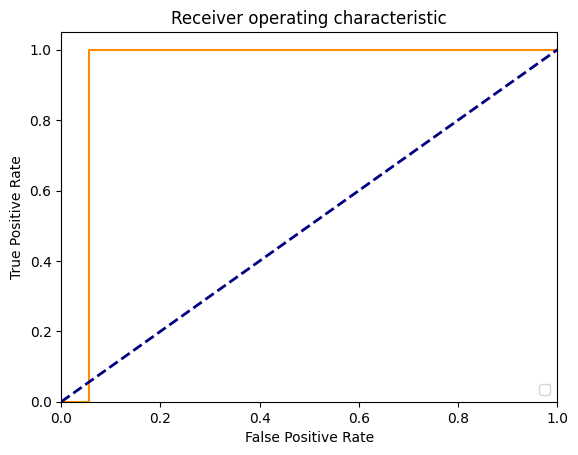

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr,tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Factor Analysis + Logistic Regression

### Factor Analysis

In [ ]:
# Select feature set and target column
X = df_two.drop(['Campaign name','Month','Ad name','Post engagement'], axis = 1)
y = df_two['Post engagement']

In [ ]:
# Checking Assumptions
chi_square_value,p_value=calculate_bartlett_sphericity(X)
print(chi_square_value, p_value)

kmo_all,kmo_model=calculate_kmo(X)
print(kmo_model)

2799.287976908737 0.0
0.77348896049082


<Axes: >

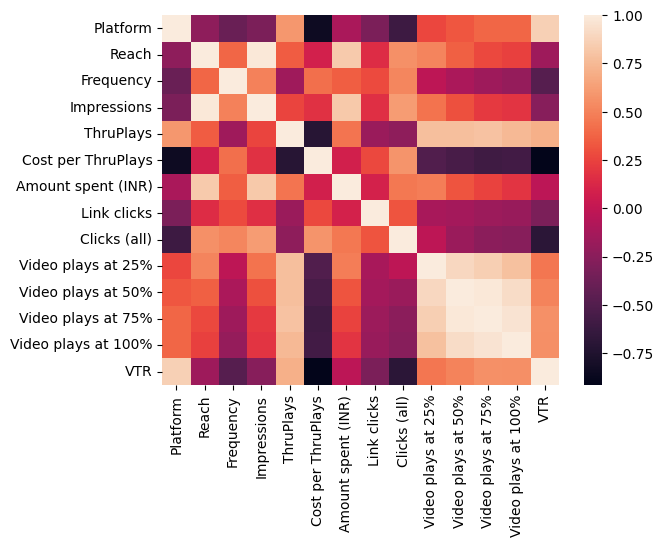

In [ ]:
# Correlation Matrix and heatmap
X.corr()
sns.heatmap(data=X.corr())

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=3, rotation='varimax')
x_fa = fa.fit_transform(X)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([6.18394324, 4.27781851, 1.01068108, 0.86637742, 0.59565578,
       0.32375697, 0.25418741, 0.1818117 , 0.11030918, 0.09254218,
       0.05392287, 0.032208  , 0.01024581, 0.00653986])

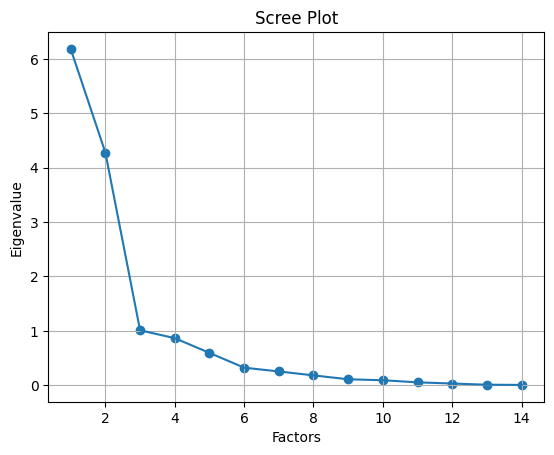

In [ ]:
# Create scree plot using matplotlib
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Print factor loadings
print(fa.loadings_)

[[ 0.15822824  0.87941989 -0.13360548]
 [ 0.2661663  -0.15530418  0.91331181]
 [-0.09437418 -0.41631014  0.4251487 ]
 [ 0.2216619  -0.24755077  0.92169436]
 [ 0.63348454  0.5866581   0.32277149]
 [-0.40083174 -0.83236168  0.08817553]
 [ 0.20143052 -0.02098475  0.85578278]
 [-0.11100657 -0.29878912  0.15497985]
 [-0.12637149 -0.59734764  0.55662318]
 [ 0.80741522  0.23611293  0.36590105]
 [ 0.95769763  0.2151216   0.15540001]
 [ 0.95960293  0.26669491  0.06828067]
 [ 0.90481765  0.27496841  0.03424139]
 [ 0.33974723  0.92092999 -0.11999518]]


In [ ]:
# Print factor communalites
print(fa.get_communalities())
load = pd.DataFrame(fa.loadings_, index=X.columns)
load
x_fa = pd.DataFrame(x_fa, columns= ['Factor 1', 'Factor 2', 'Factor 3'])
x_train_fa, x_test_fa, y_train, y_test = train_test_split(x_fa, y, test_size = 0.2, random_state=42)

[0.81626594 0.92910235 0.36297203 0.95993587 0.84965183 0.86126698
 0.77337878 0.12561615 0.68262331 0.84155224 0.98761121 0.99662622
 0.89547508 0.97793907]


In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x_fa.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x_fa.values, i)
                          for i in range(len(x_fa.columns))]

print(vif_data)

    feature       VIF
0  Factor 1  1.000052
1  Factor 2  1.000164
2  Factor 3  1.000112


### Logistics Regression after Factor Analysis using sklearn

Accuracy: 0.8888888888888888
Confusion Matrix:
 [[17  1]
 [ 2  7]]


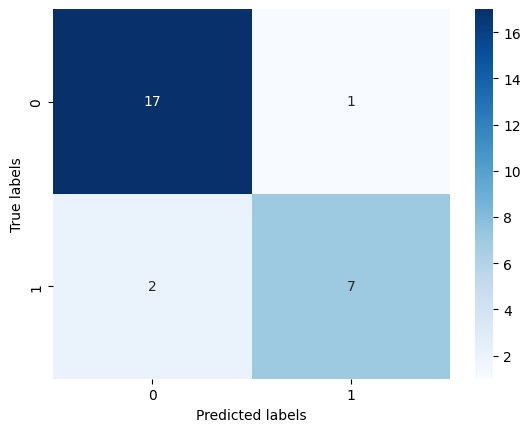

In [ ]:
# Fitting the model
lr = LogisticRegression(random_state=42)
lr.fit(x_train_fa, y_train)


# Printing evaluation metrics
y_pred = lr.predict(x_test_fa)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
cm_nb = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
# Classification report
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.94      0.92        18
           1       0.88      0.78      0.82         9

    accuracy                           0.89        27
   macro avg       0.88      0.86      0.87        27
weighted avg       0.89      0.89      0.89        27



In [ ]:
# Compute ROC curve and ROC area for each class
y_pred_proba = lr.predict_proba(x_test_fa)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"AUC: {roc_auc}")

AUC: 0.9320987654320988


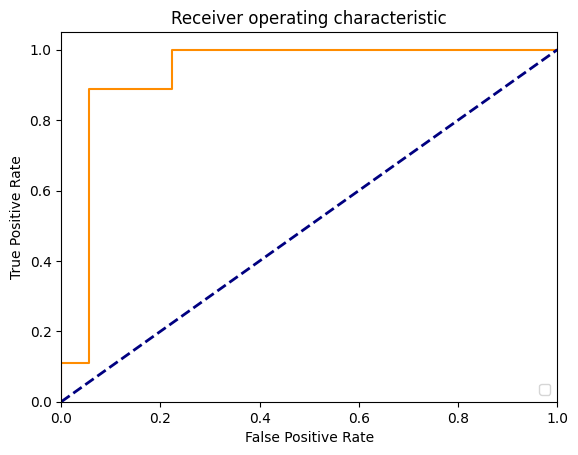

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr,tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Logistics Regression after Factor Analysis using statsmodels

In [ ]:
# Building the model and fitting the data
log_reg_fa = sm.Logit(y_train, x_train_fa).fit()

# Printing the summary table
print(log_reg_fa.summary())

# performing predictions on the test dataset
yhat_fa = log_reg_fa.predict(x_test_fa)
prediction_fa = list(map(round, yhat_fa))

Optimization terminated successfully.
         Current function value: inf
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Post engagement   No. Observations:                  106
Model:                          Logit   Df Residuals:                      103
Method:                           MLE   Df Model:                            2
Date:                Wed, 15 Nov 2023   Pseudo R-squ.:                     inf
Time:                        08:44:30   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Factor 1       0.8600      0.316      2.722      0.006       0.241       1.479
Factor 2       2.1172      0.495  

/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:595: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


Confusion Matrix : 
 [[11  7]
 [ 1  8]]


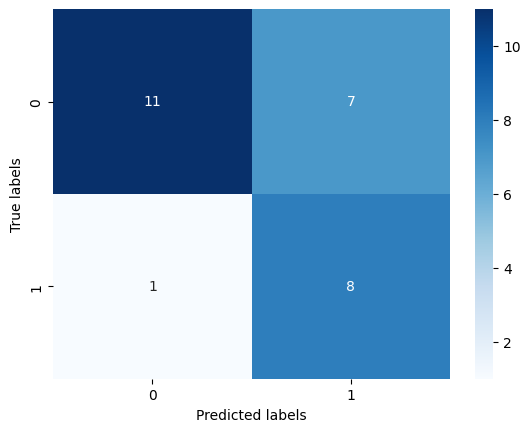

Test accuracy =  0.7037037037037037


In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, prediction_fa)
print("Confusion Matrix : \n", cm)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Accuracy score of the model
print('Test accuracy = ', accuracy_score(y_test, prediction_fa))

In [ ]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = metrics.roc_curve(y_test, yhat_fa)
roc_auc = roc_auc_score(y_test, yhat_fa)

print(f"AUC: {roc_auc}")

AUC: 0.8950617283950617


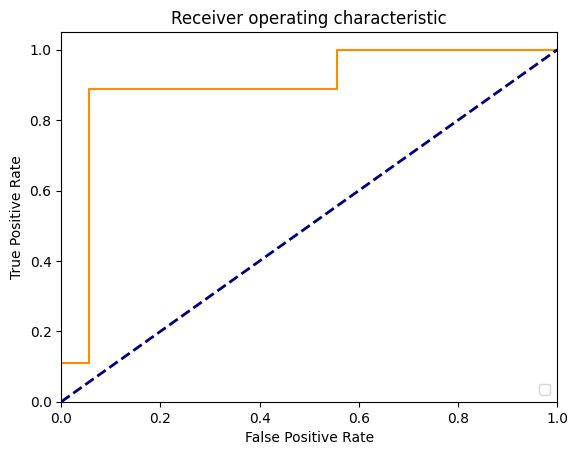

In [ ]:
# Plot ROC curve
plt.figure()
plt.plot(fpr,tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Discriminant Analysis

### Normalization

**Checking the assumptions of discriminant analysis** <br>
The independent variables should be normally distributed.

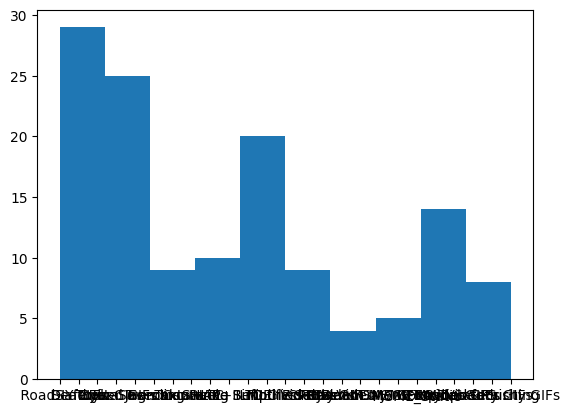

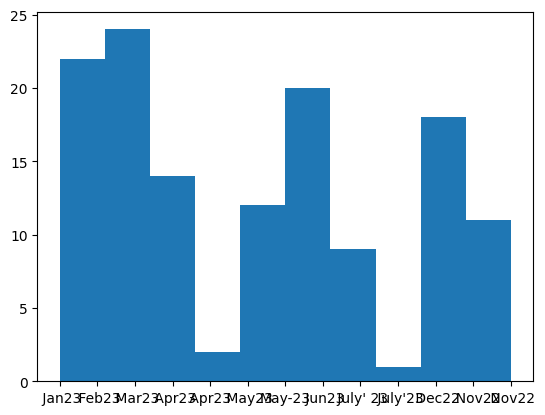

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


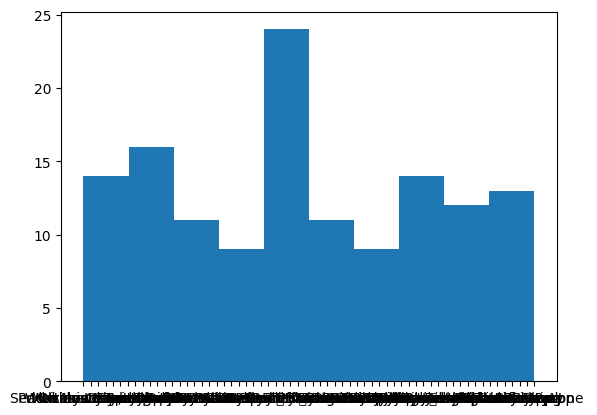

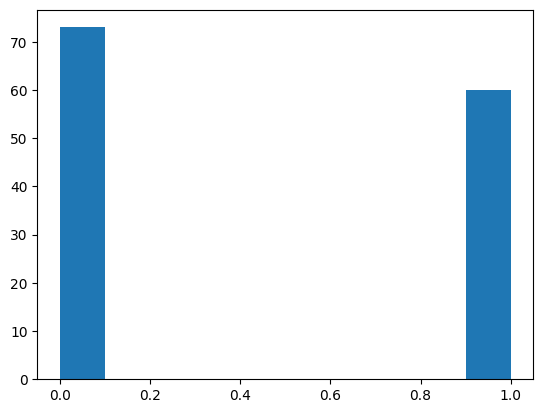

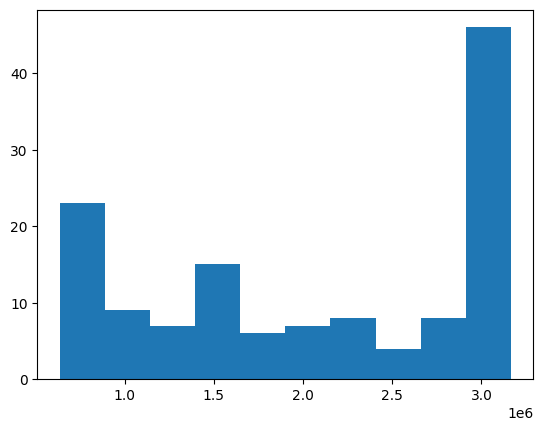

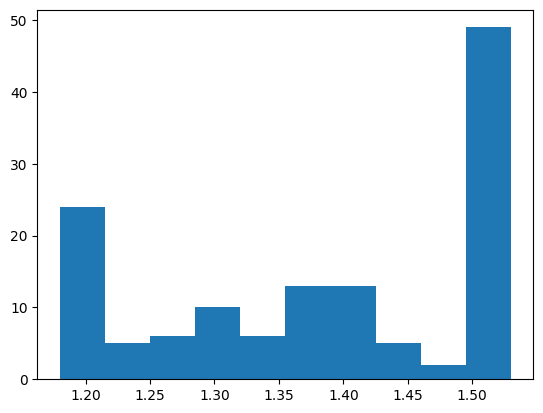

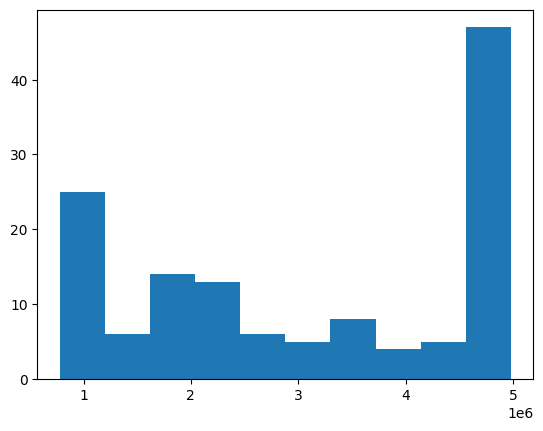

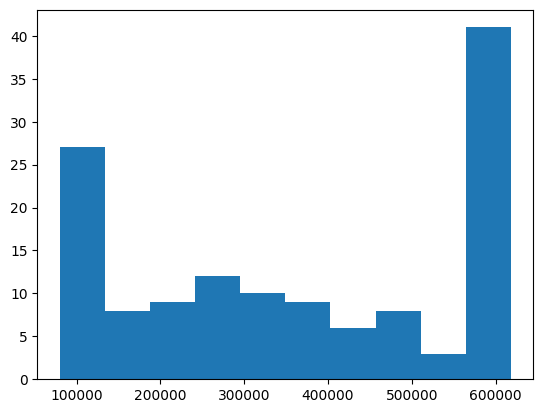

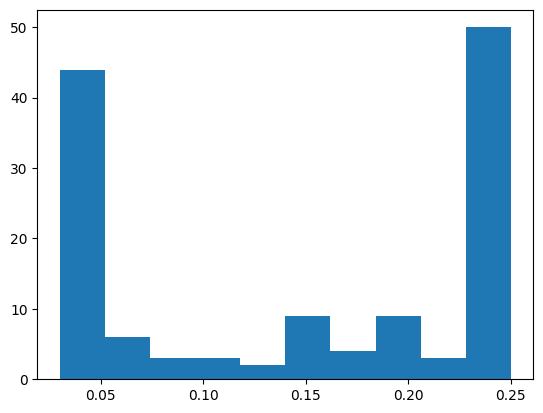

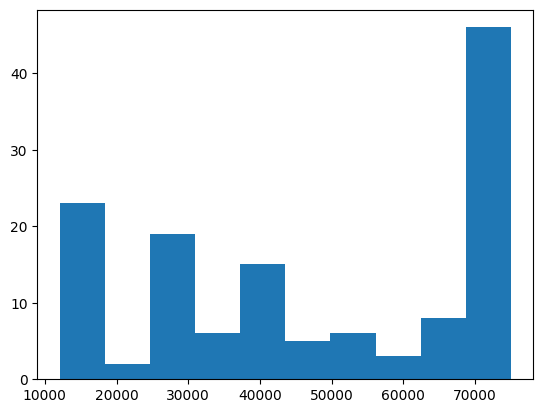

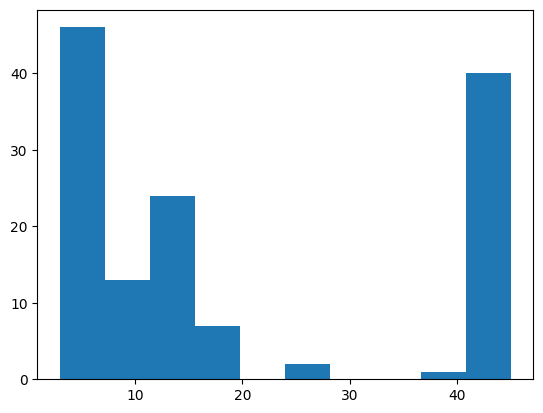

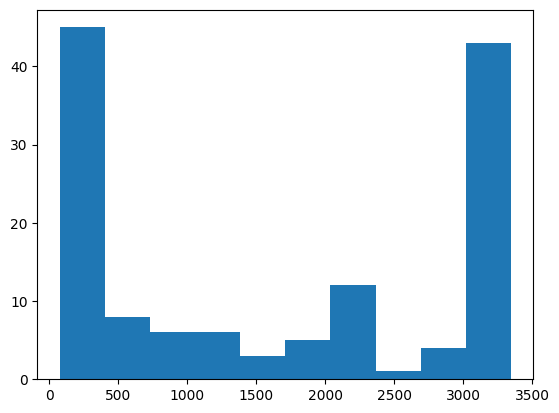

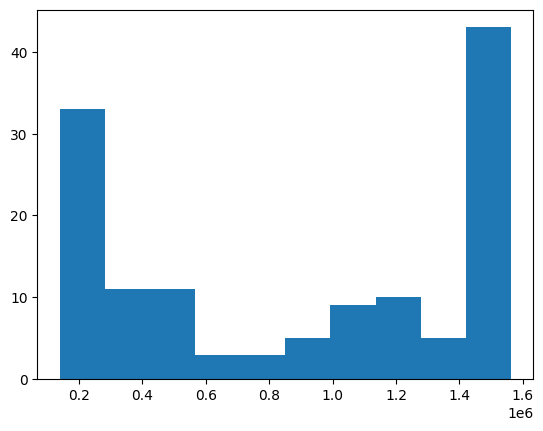

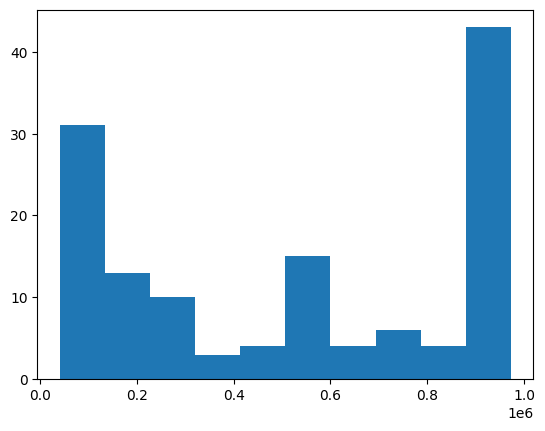

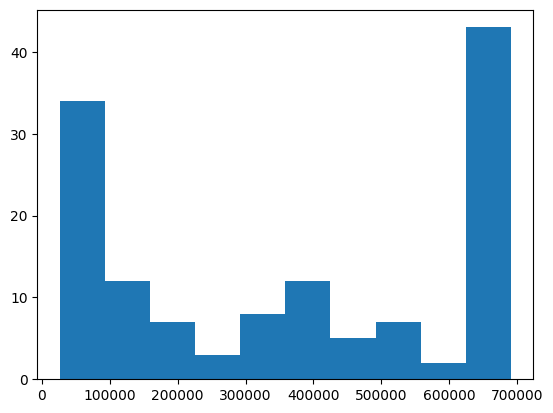

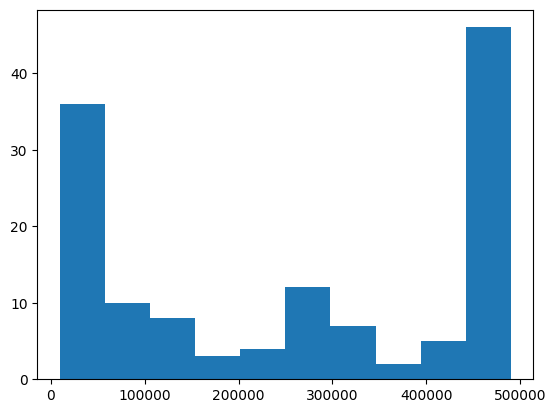

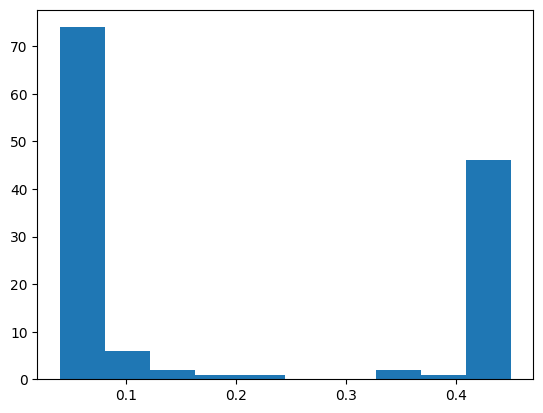

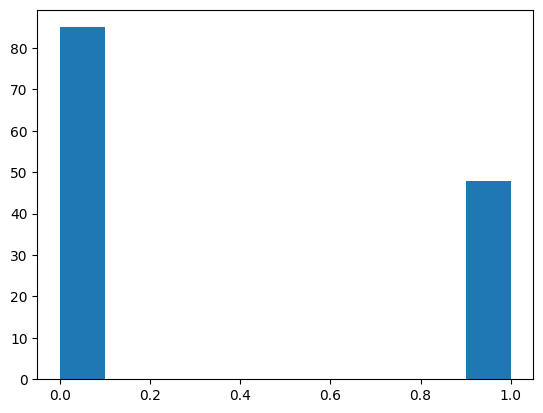

In [ ]:
# Checking the distribution of all the variables
for i in df_two.columns:
    plt.hist(df_two[i])
    plt.show()

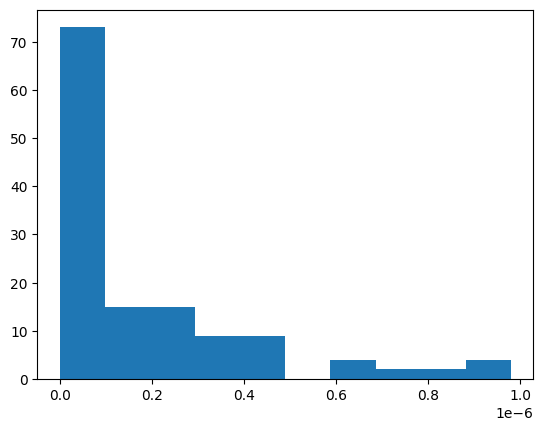

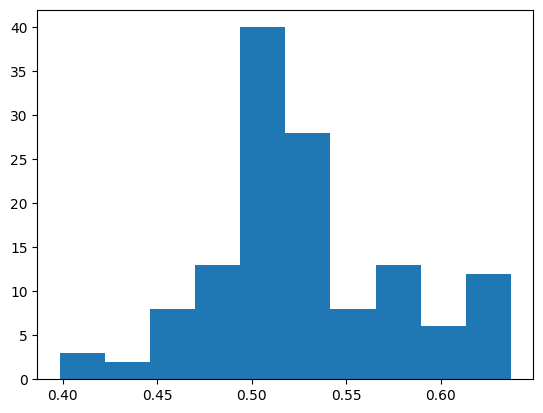

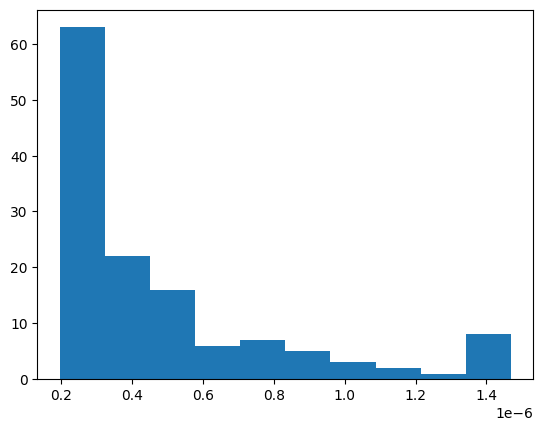

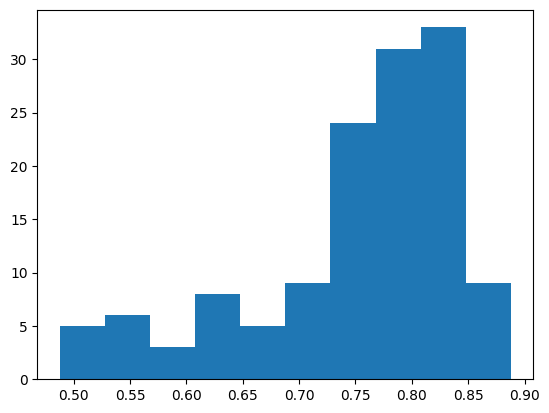

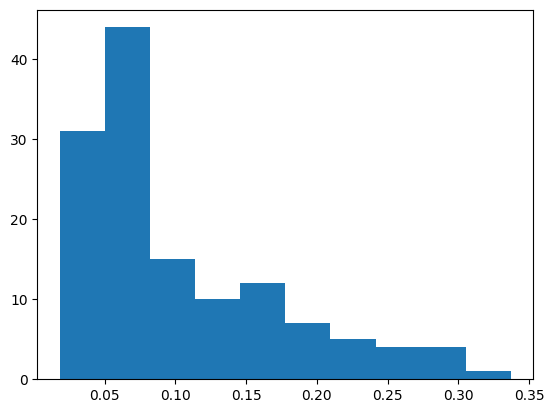

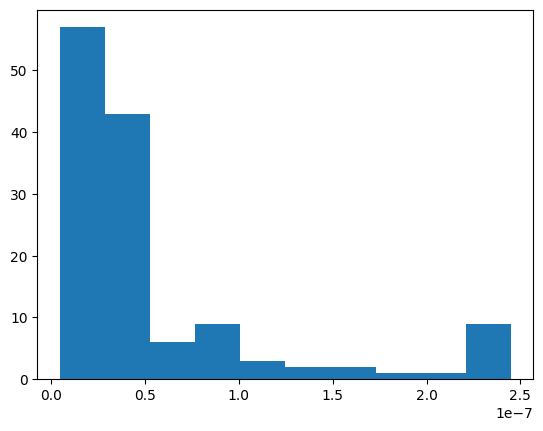

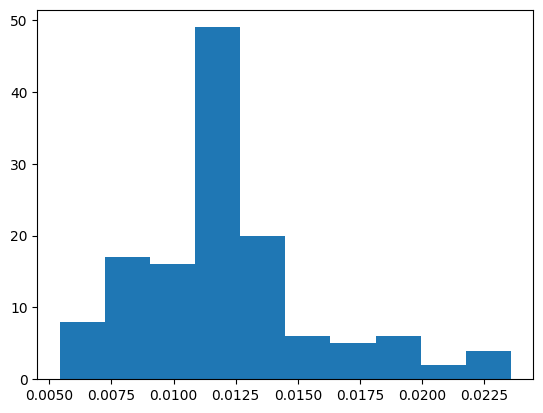

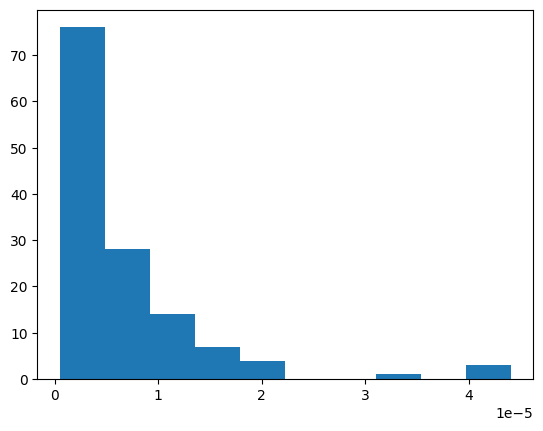

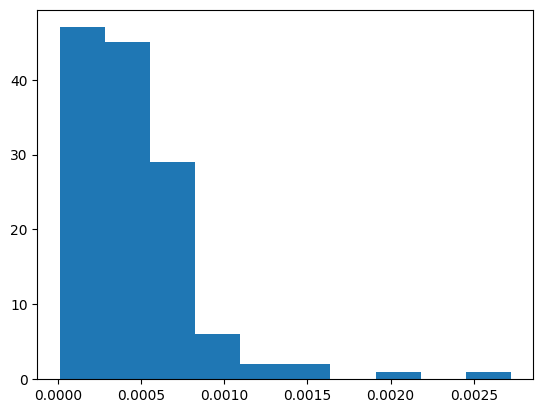

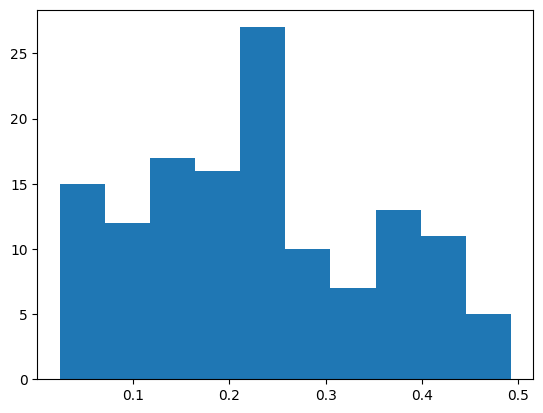

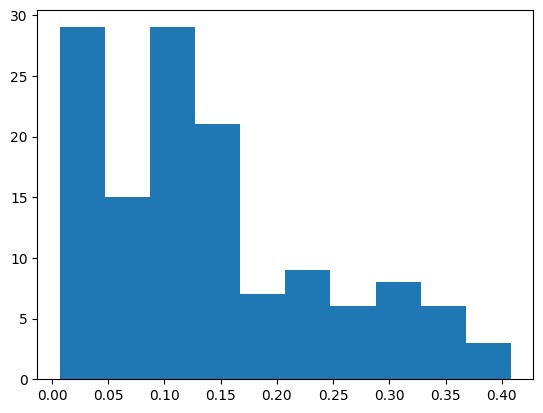

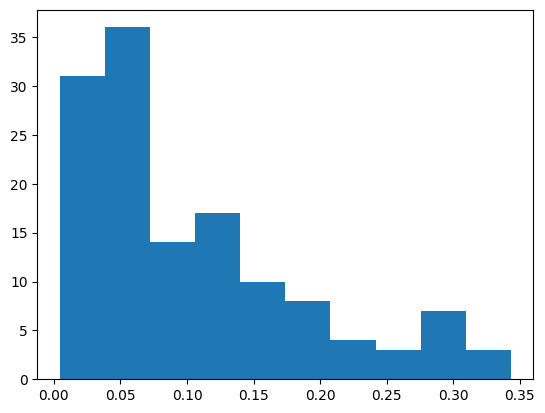

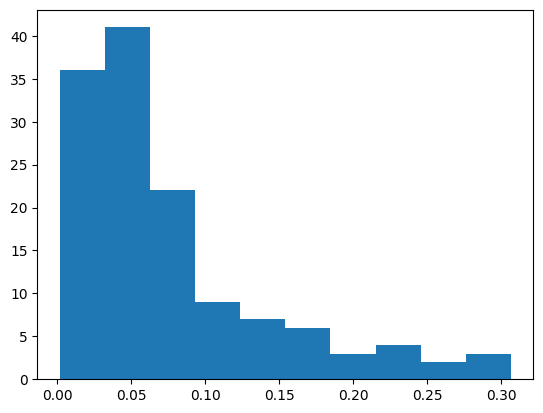

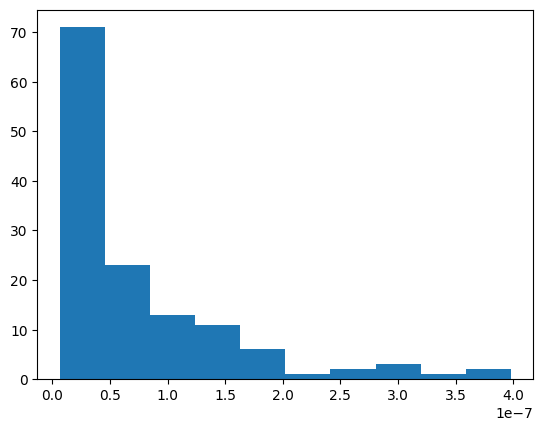

In [ ]:
# Normalizing data by sklearn
X = df_two.drop(['Campaign name','Month','Ad name','Post engagement'], axis = 1)
d = preprocessing.normalize(X)
scaled_df = pd.DataFrame(d, columns=X.columns)

for i in scaled_df.columns:
    plt.hist(scaled_df[i])
    plt.show()

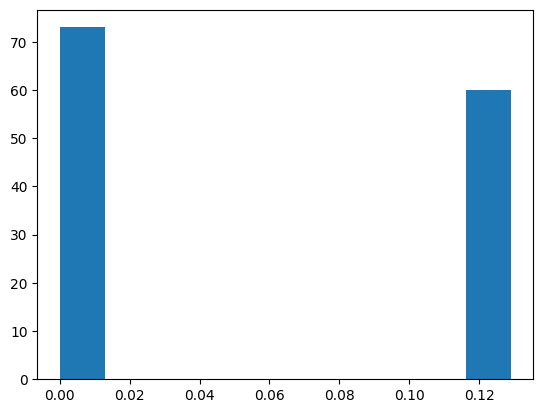

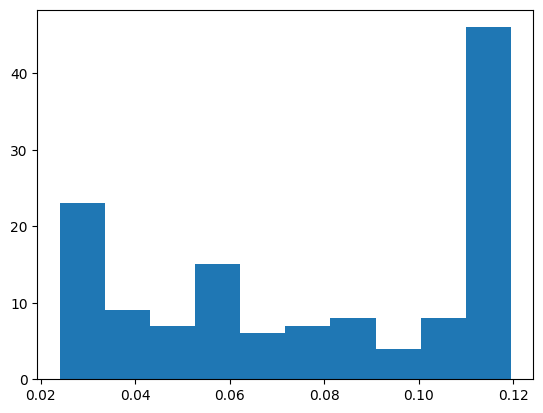

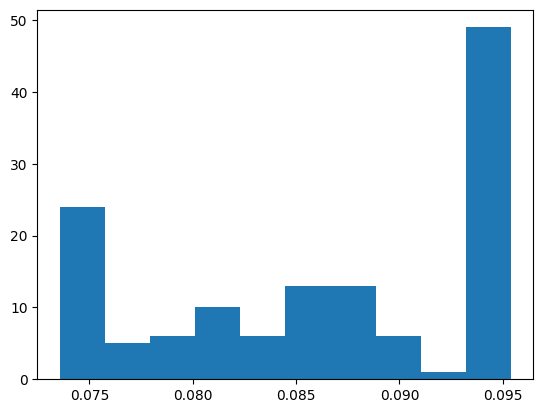

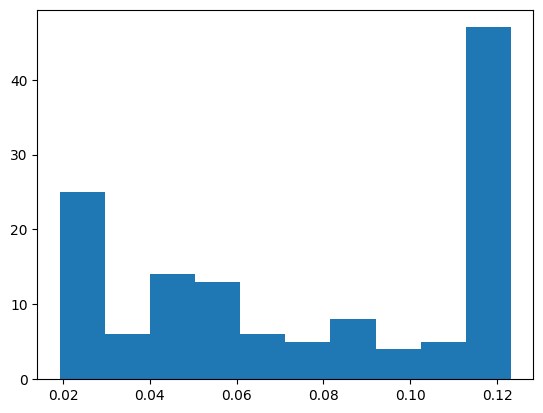

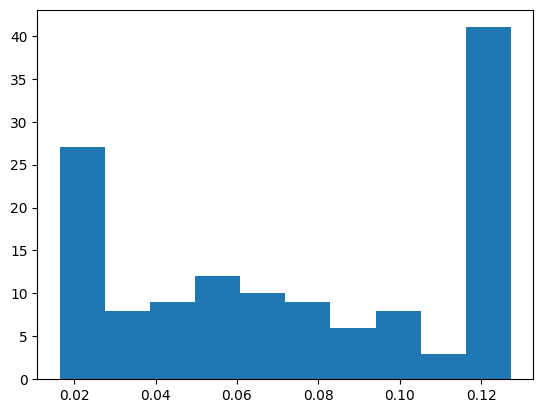

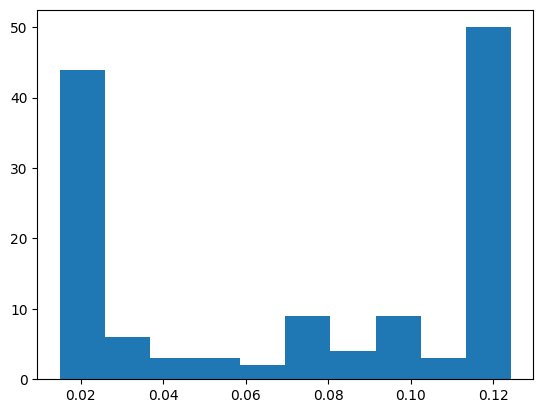

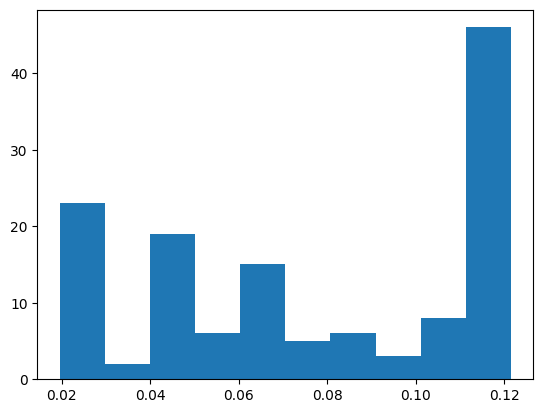

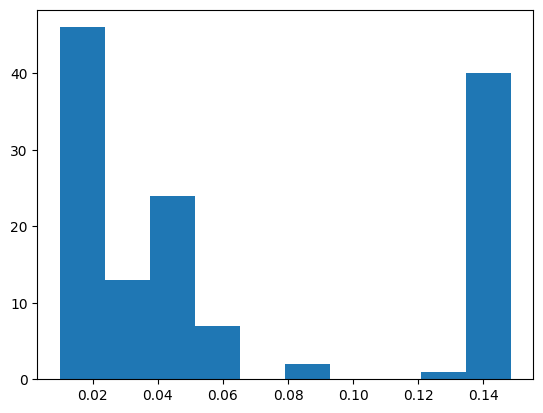

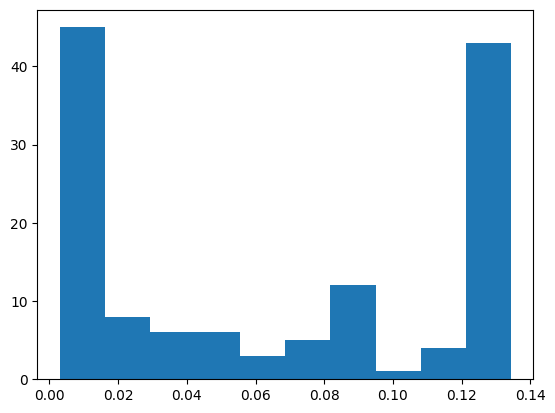

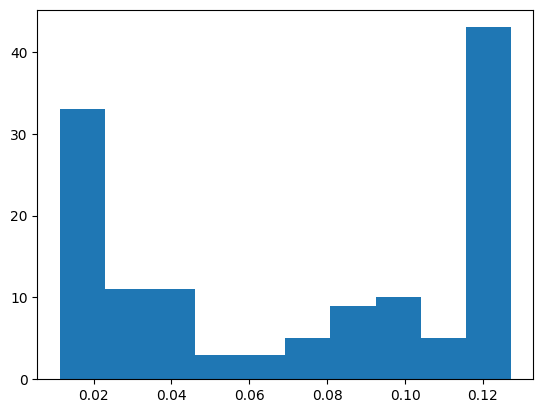

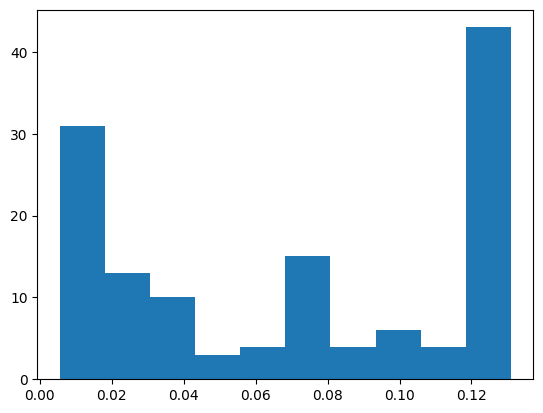

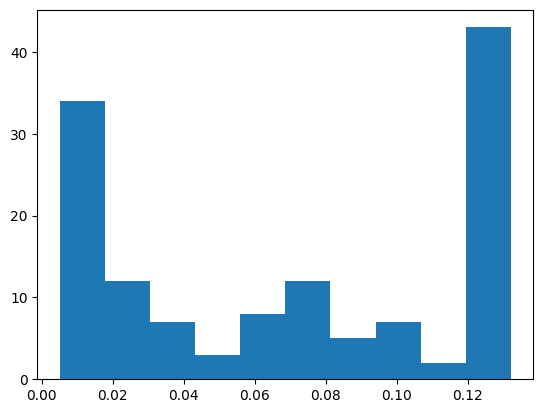

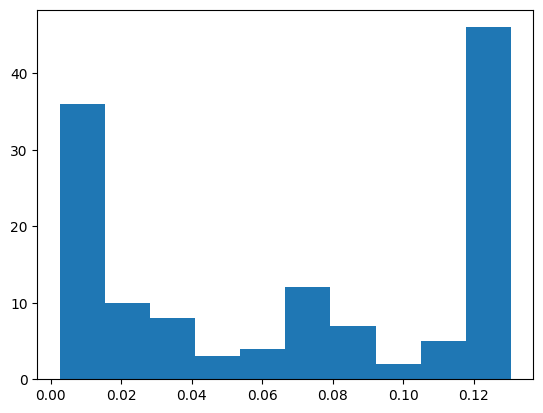

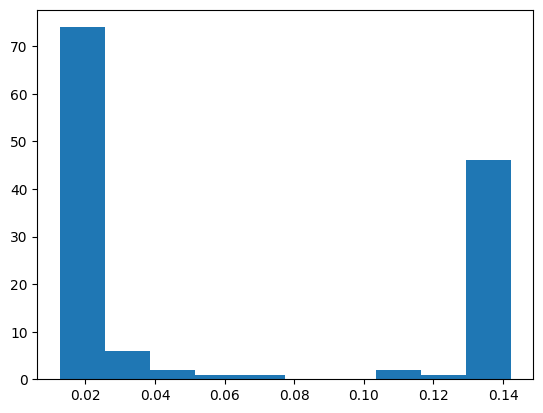

In [ ]:
# Normalizing data by sklearn and setting axis=0
from sklearn import preprocessing
d1 = preprocessing.normalize(X,axis=0)
scaled_df1 = pd.DataFrame(d1, columns=X.columns)

for i in scaled_df1.columns:
    plt.hist(scaled_df1[i])
    plt.show()

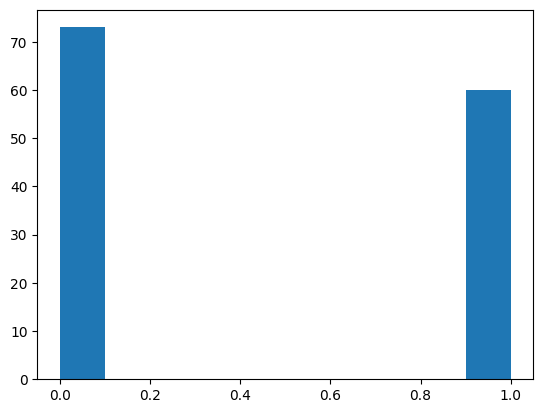

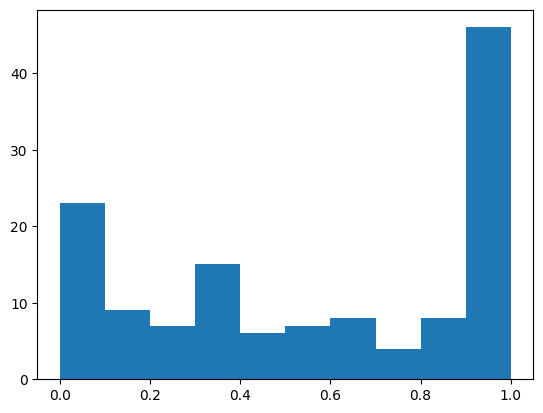

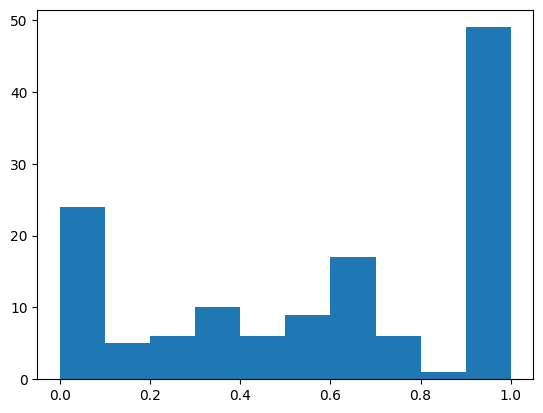

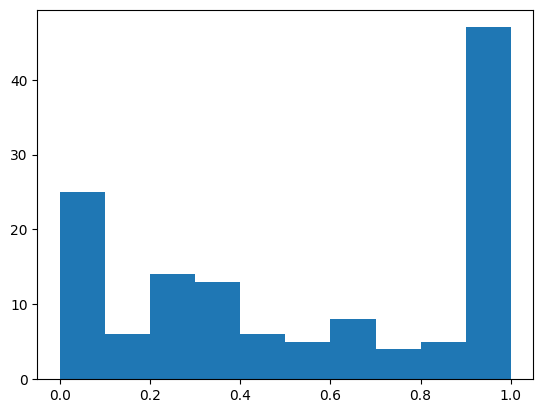

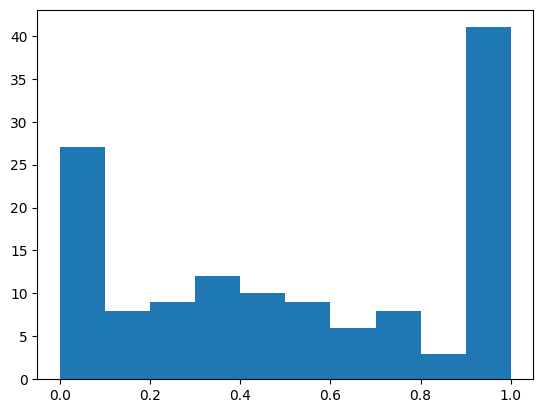

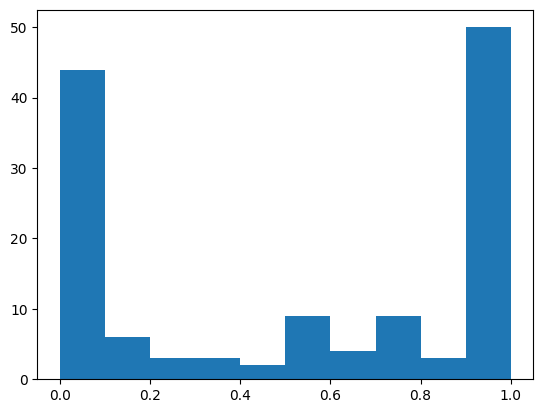

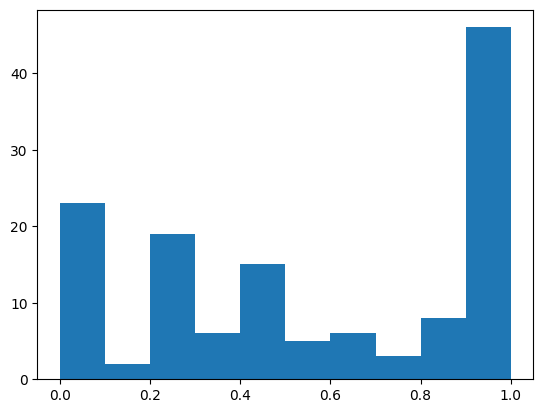

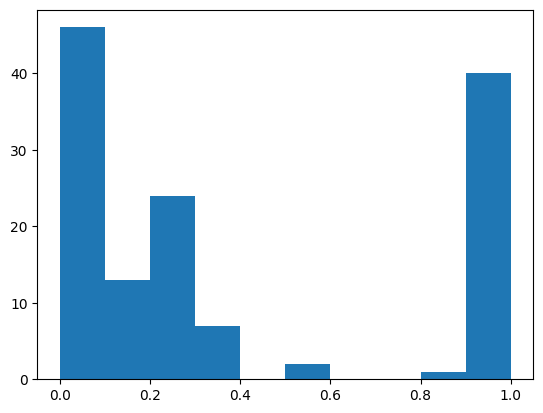

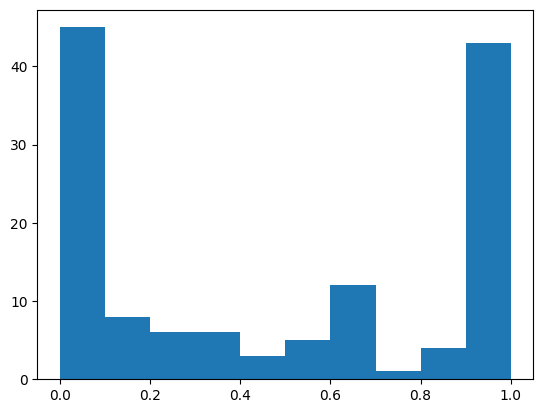

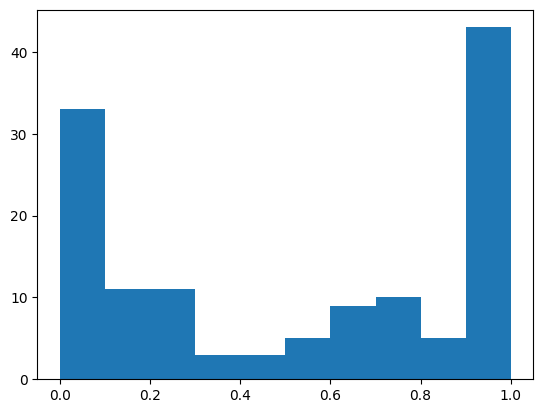

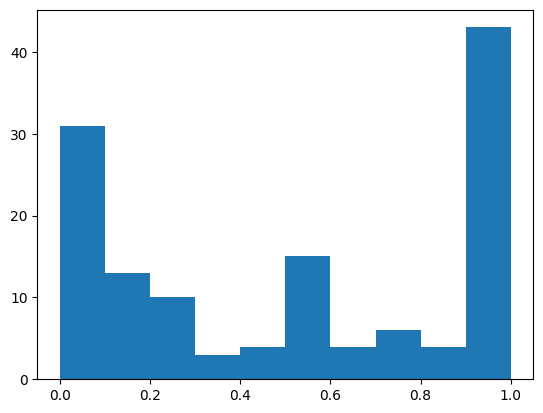

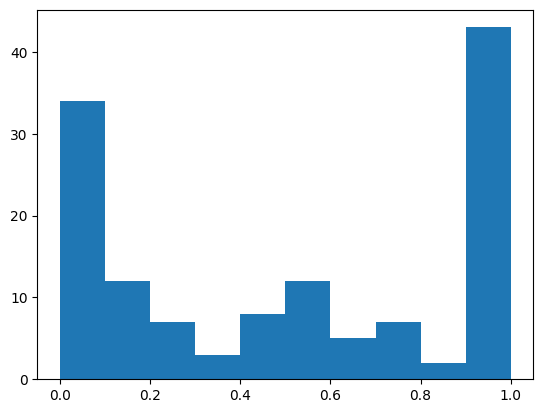

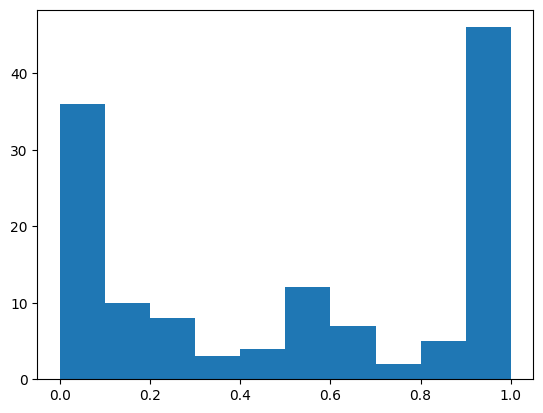

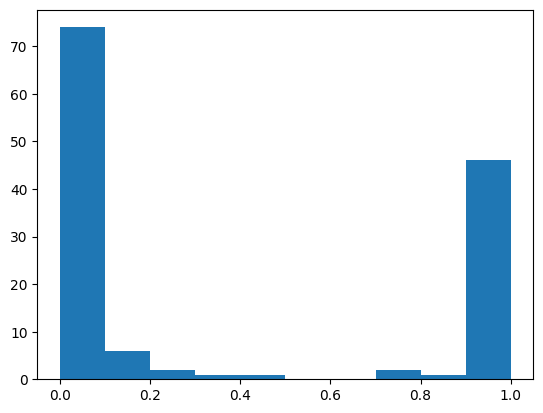

In [ ]:
# Normalizing data by MinMaxScaler
scaler = preprocessing.MinMaxScaler()
d2 = scaler.fit_transform(X)
scaled_df2 = pd.DataFrame(d2, columns=X.columns)

for i in scaled_df2.columns:
    plt.hist(scaled_df2[i])
    plt.show()

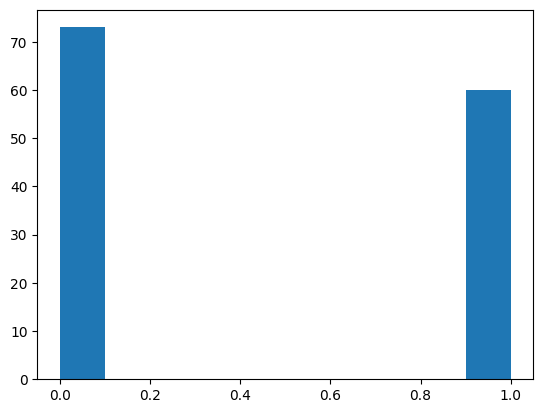

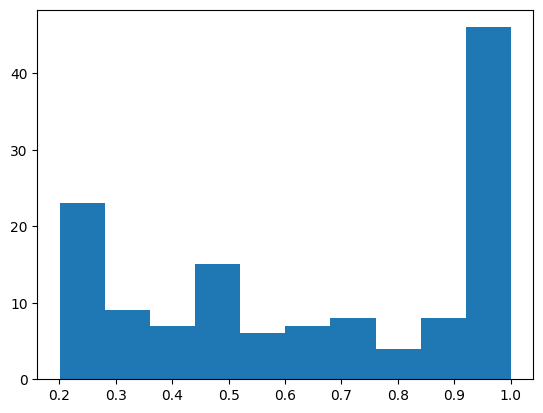

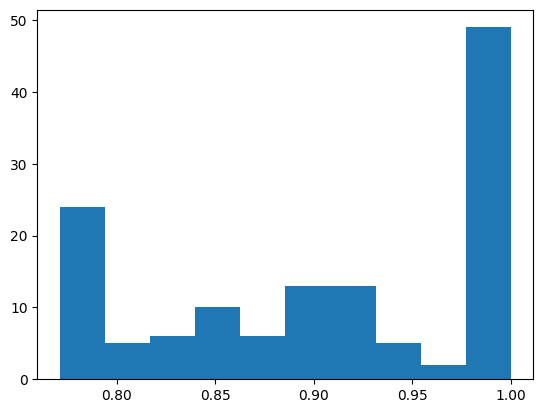

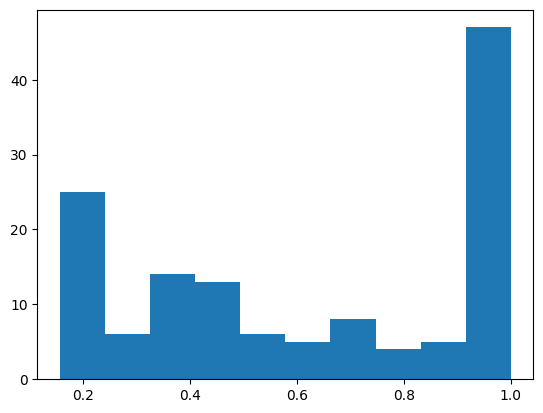

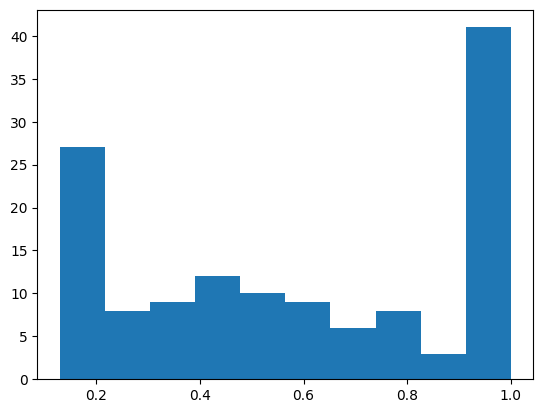

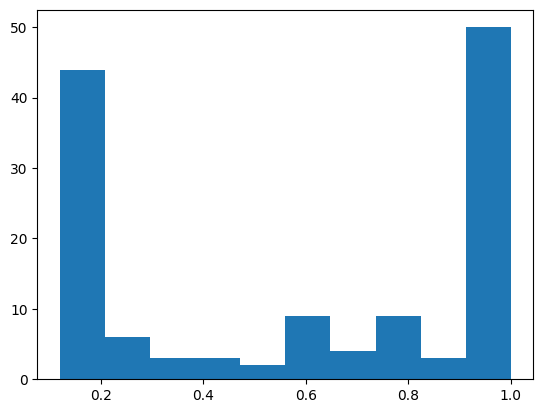

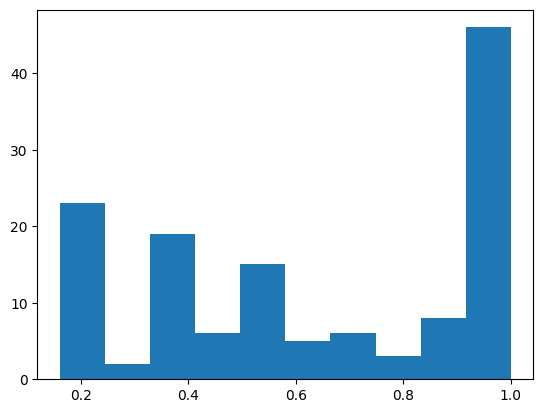

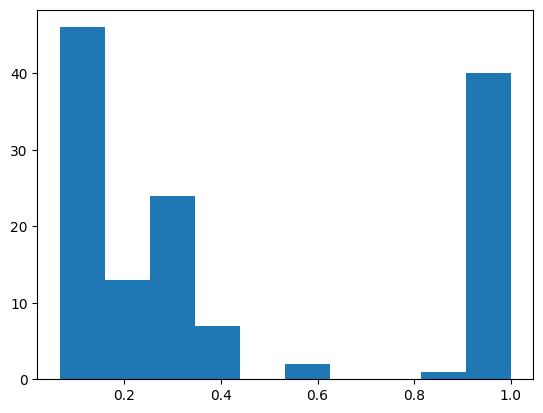

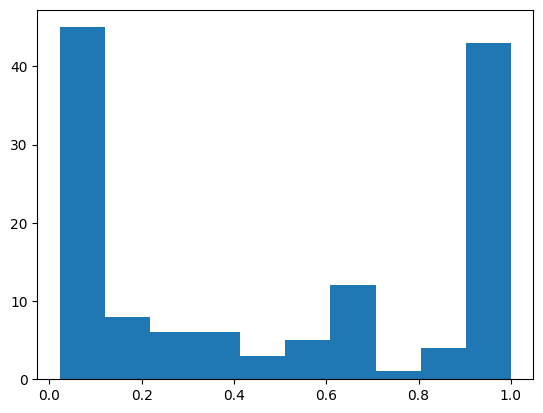

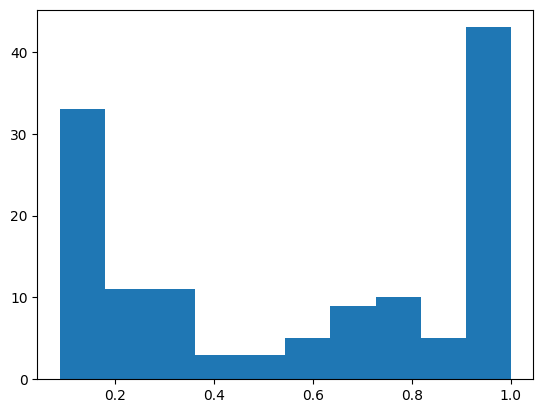

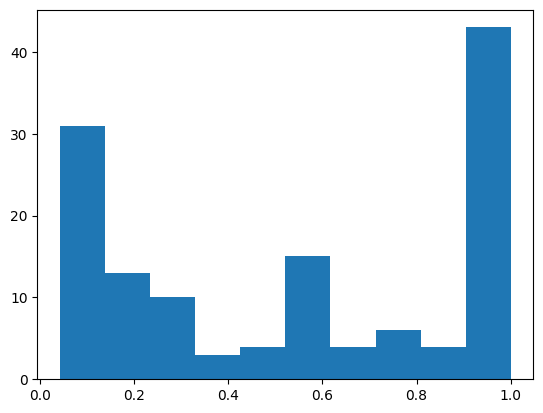

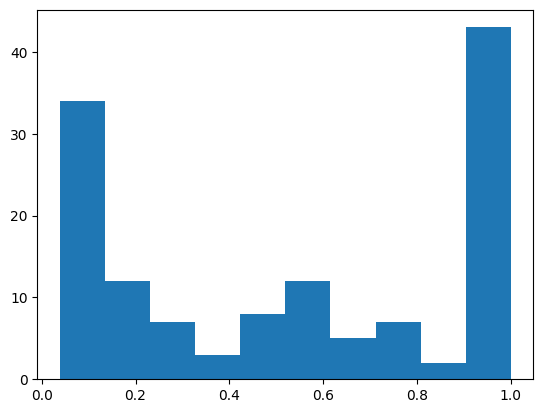

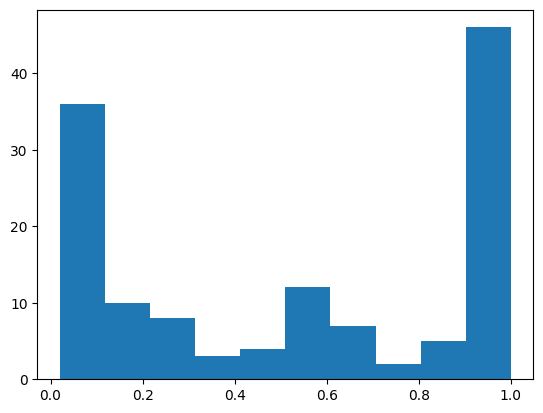

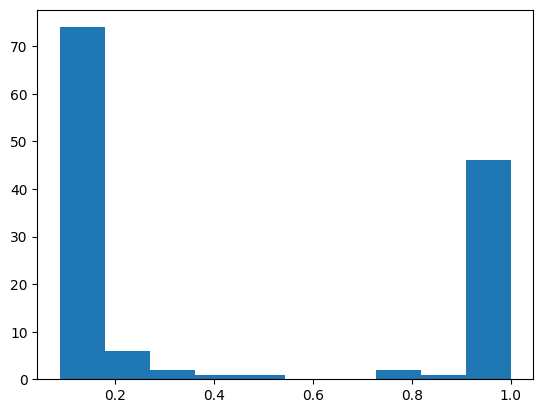

In [ ]:
# Normalizing data
X1 = X.copy()

# Apply normalization techniques
for column in X1.columns:
    X1[column] = X1[column] / X1[column].abs().max()

for i in X1.columns:
    plt.hist(X1[i])
    plt.show()

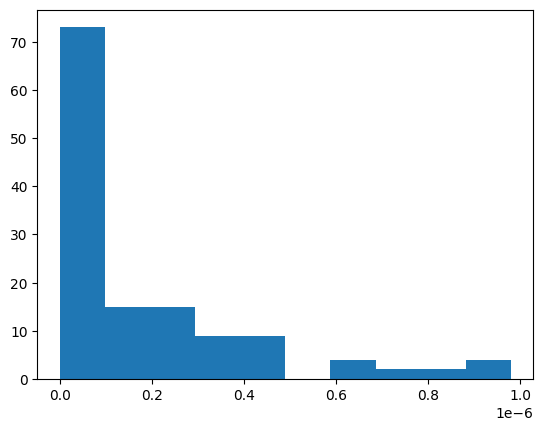

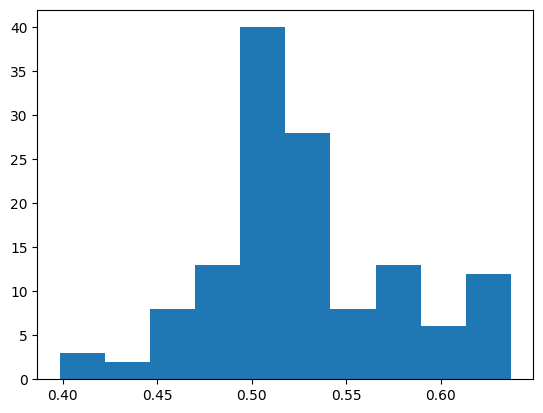

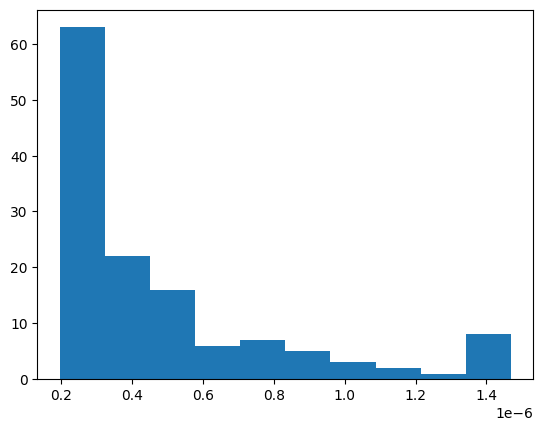

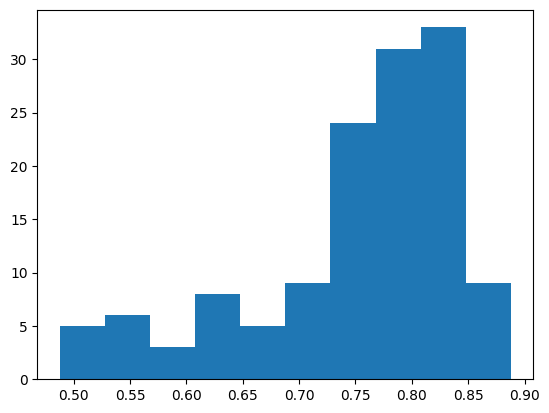

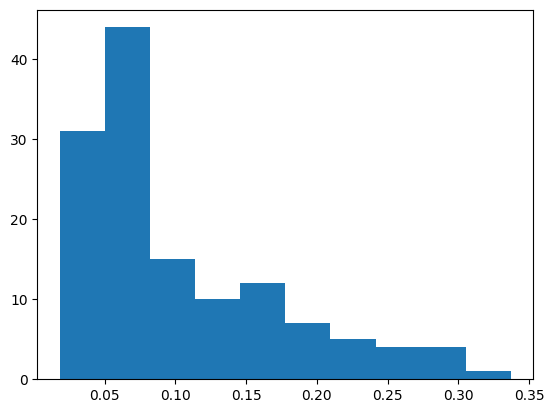

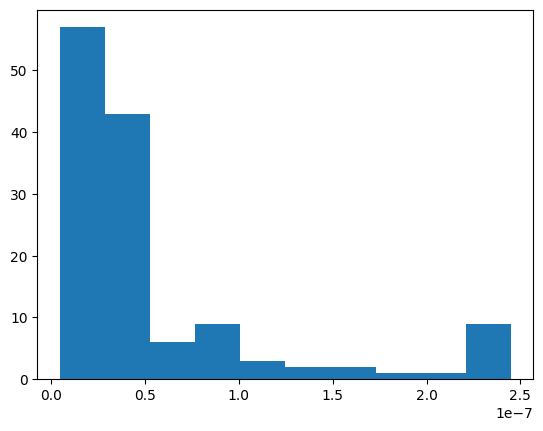

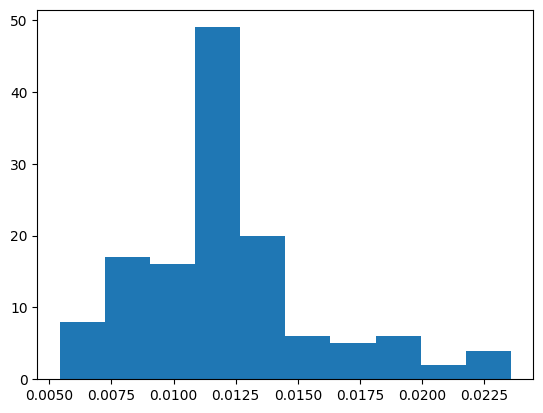

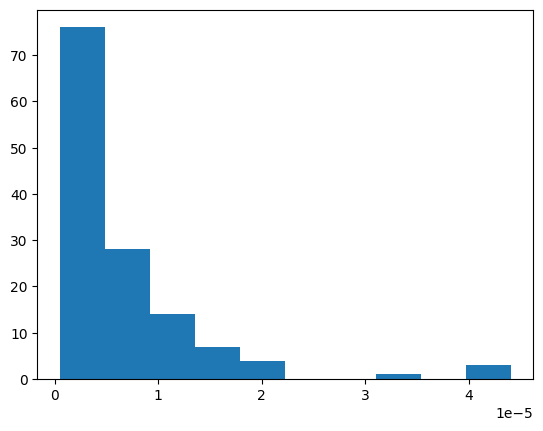

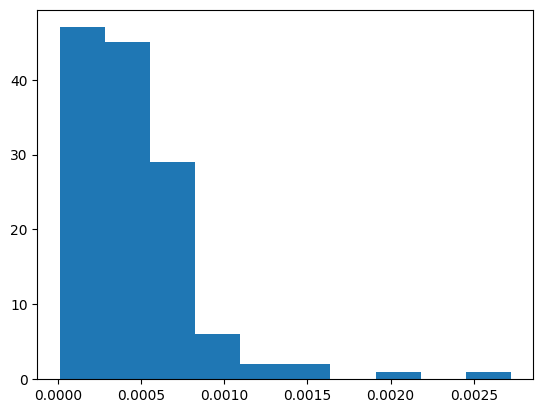

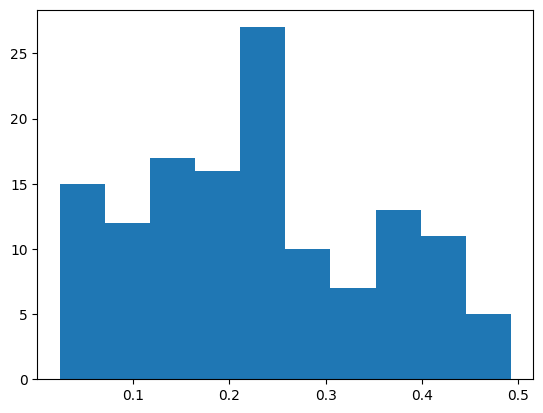

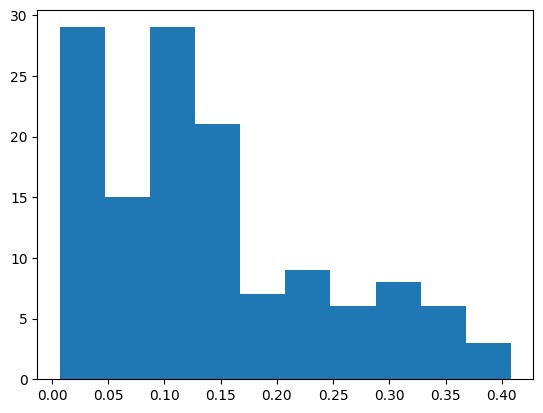

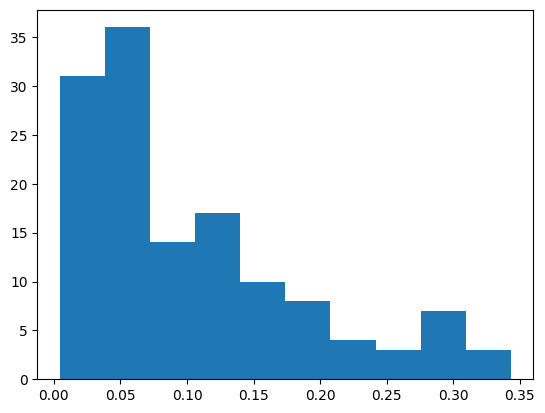

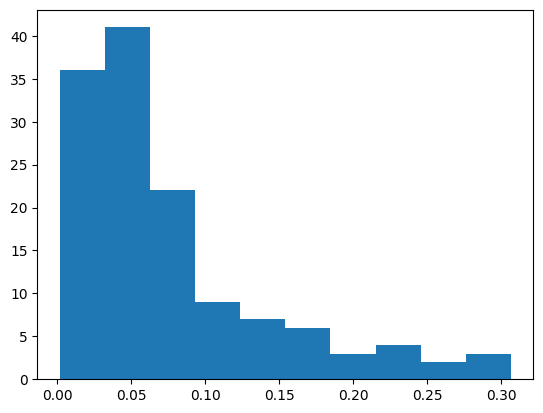

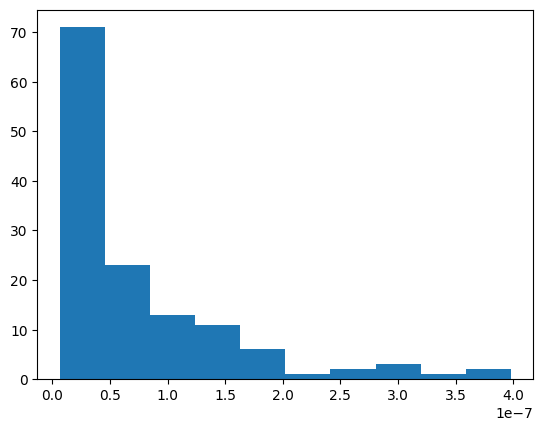

In [ ]:
# Normalizing data by linalg
X_norm = X / np.linalg.norm(X, axis=1, keepdims=True)

for i in X_norm.columns:
    plt.hist(X_norm[i])
    plt.show()

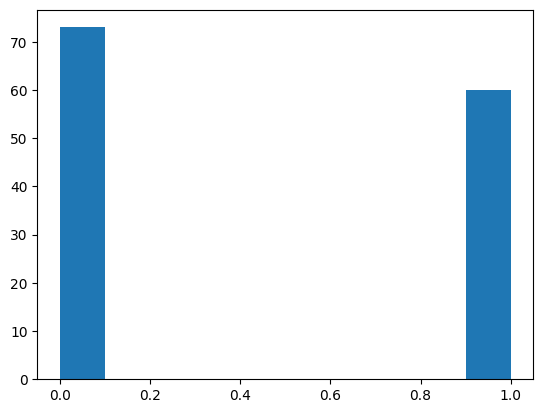

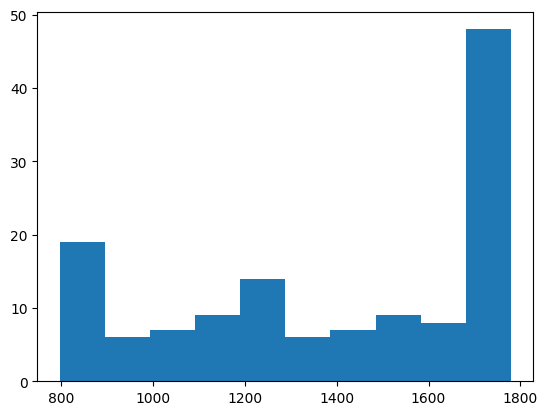

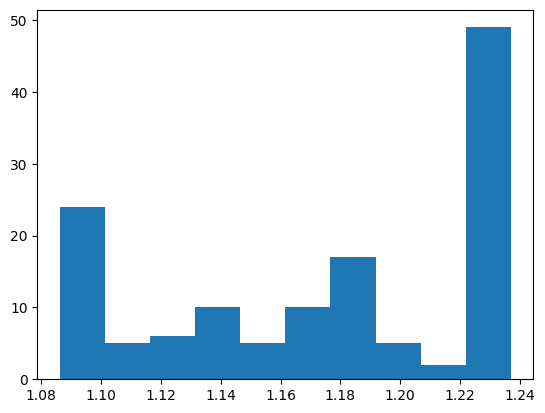

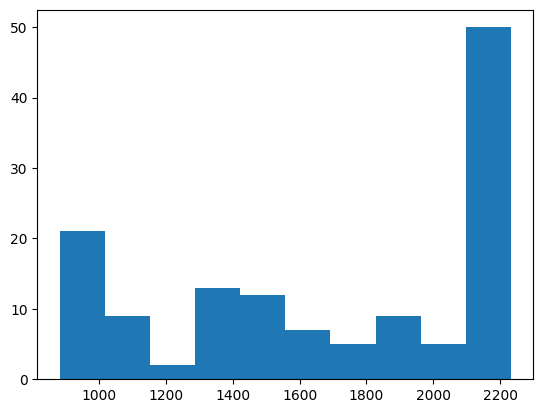

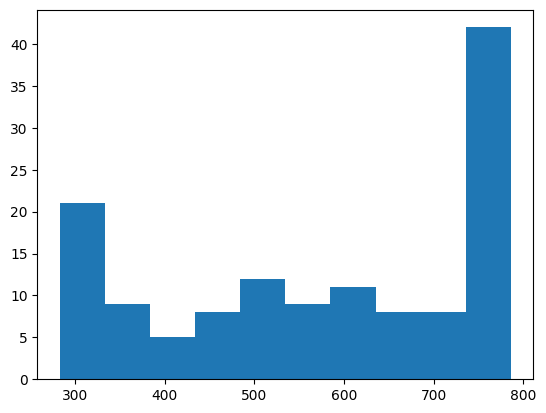

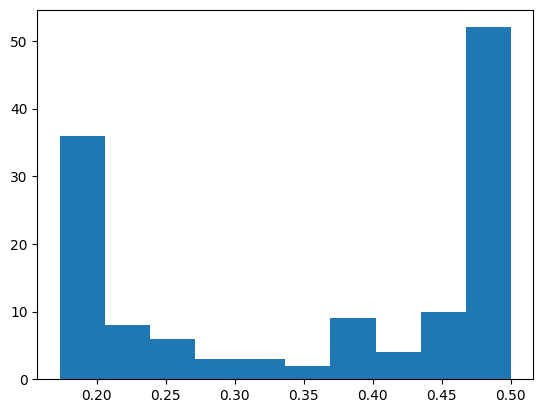

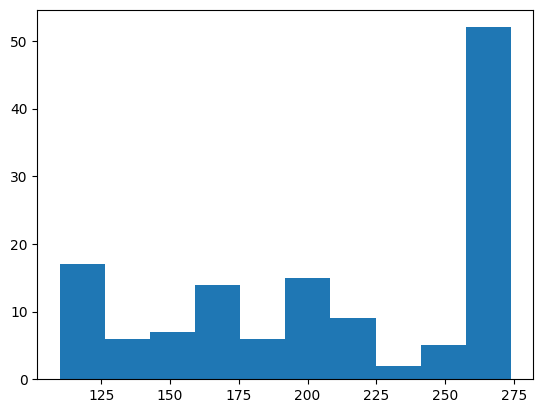

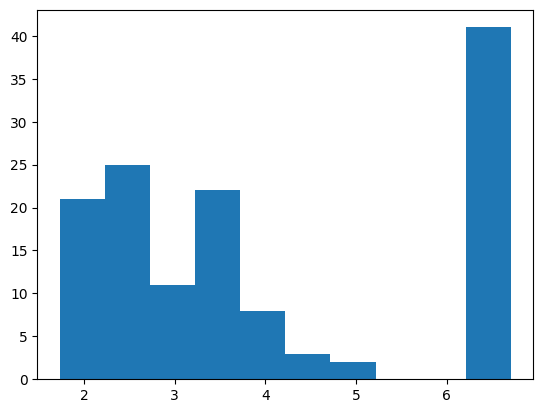

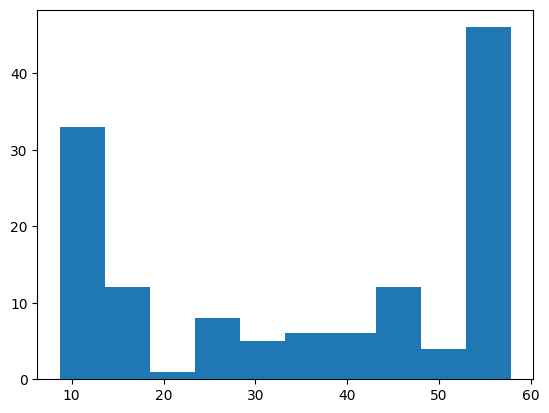

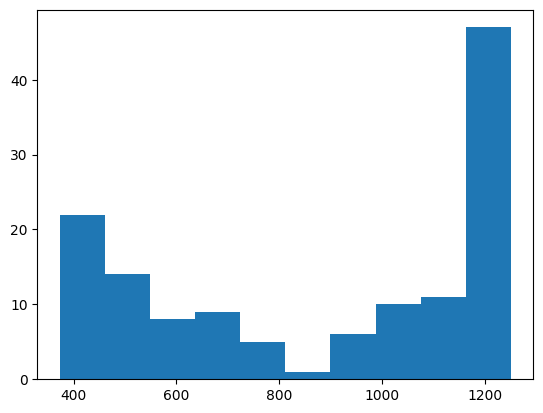

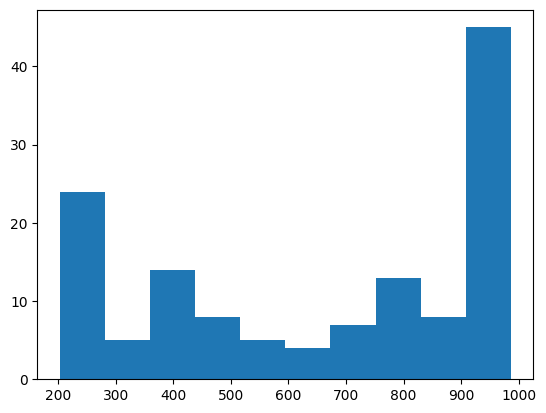

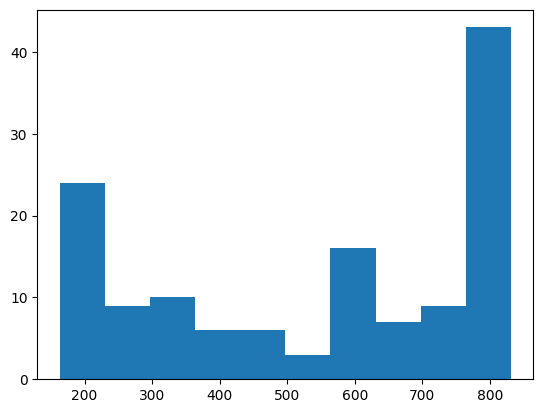

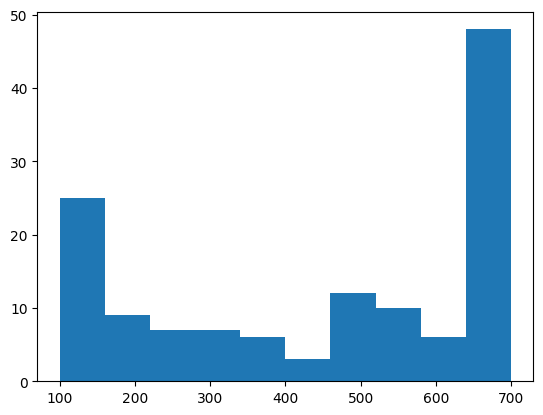

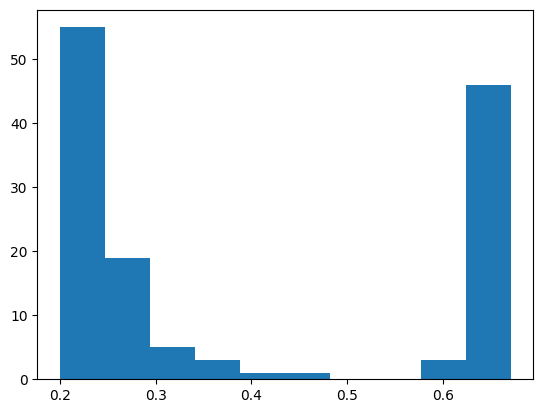

In [ ]:
# Normalizing data by taking square root
X_sqrt = np.sqrt(X)

for i in X_sqrt.columns:
    plt.hist(X_sqrt[i])
    plt.show()

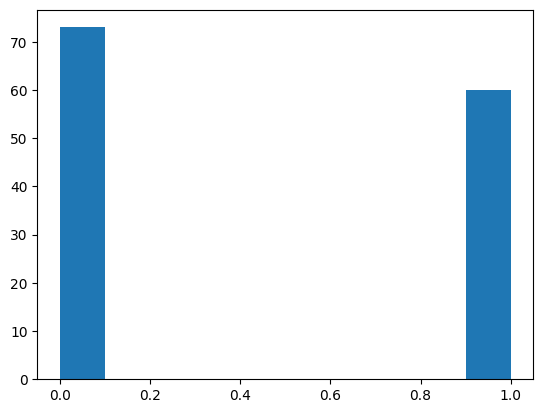

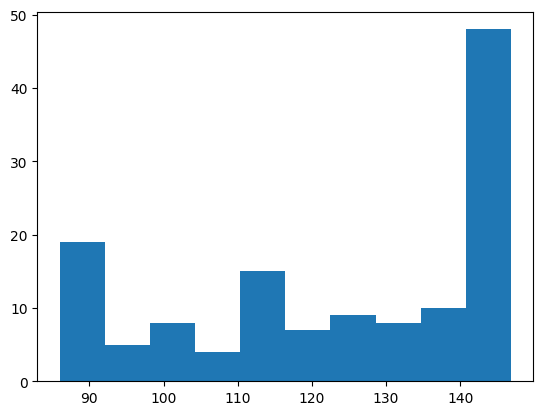

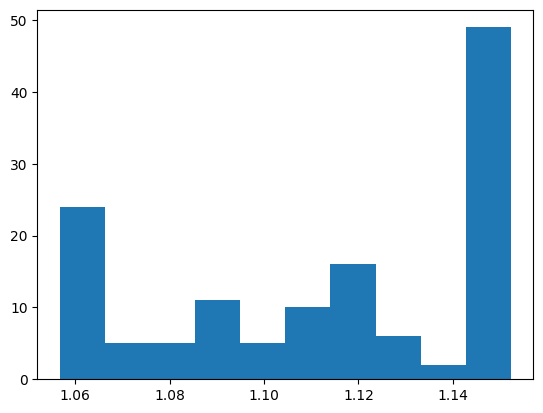

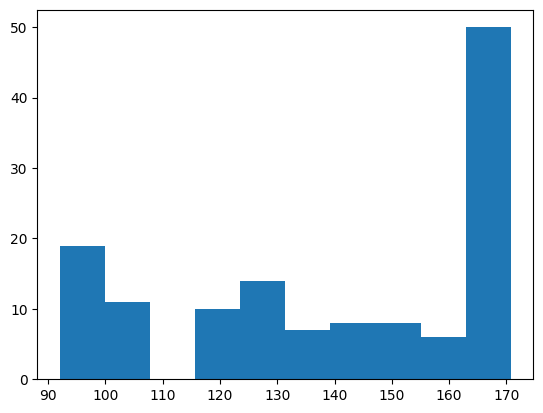

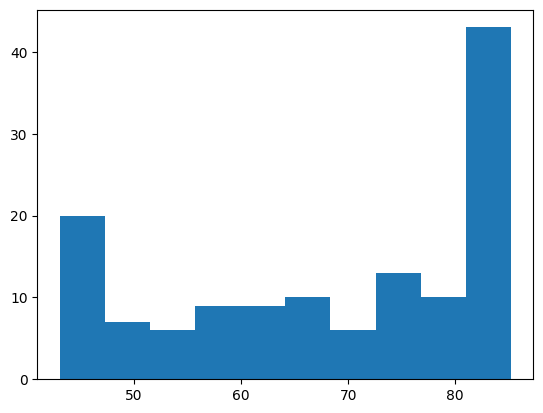

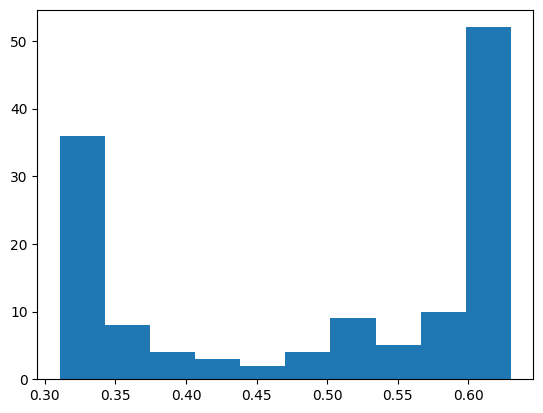

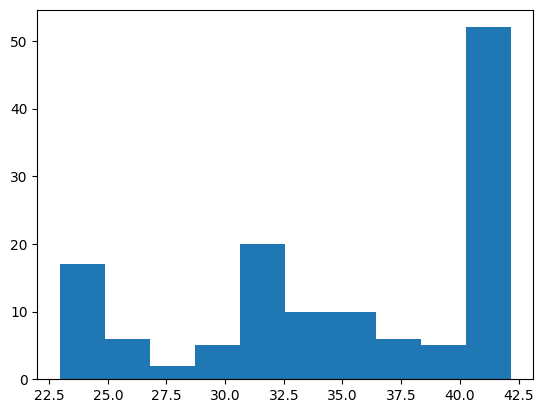

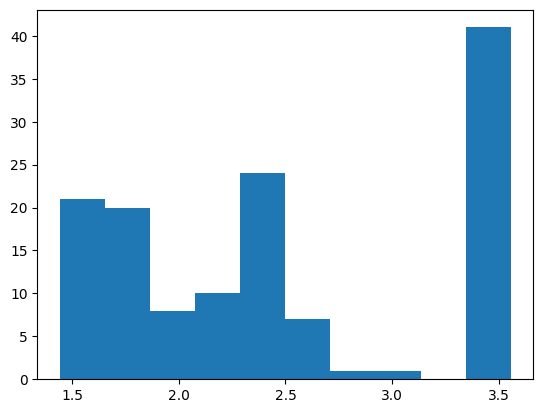

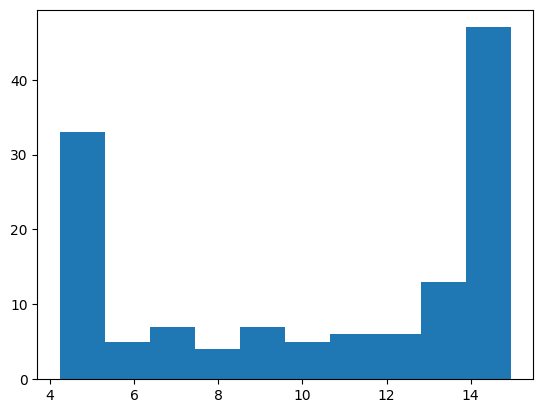

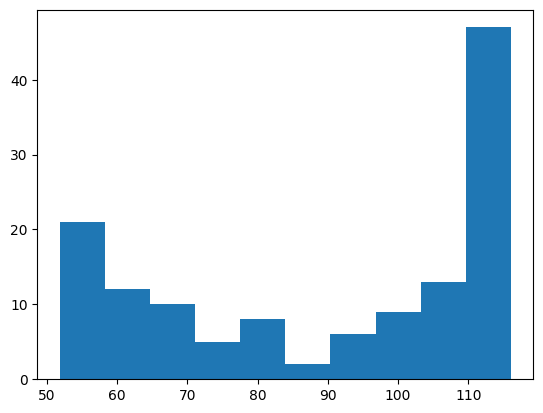

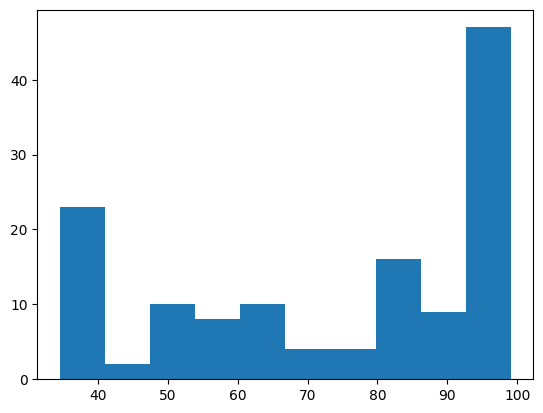

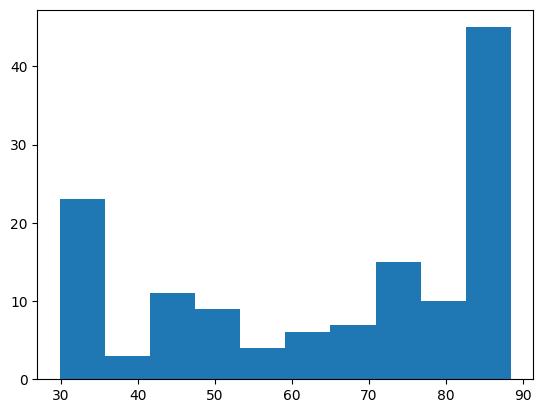

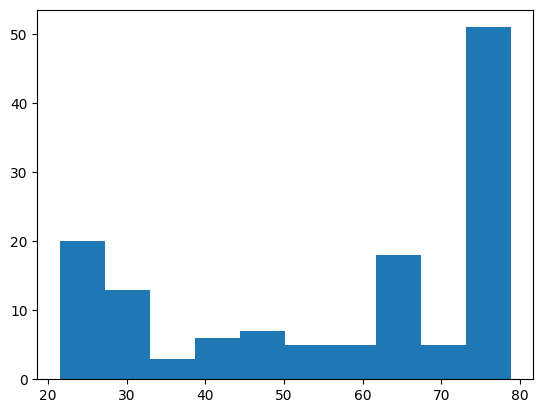

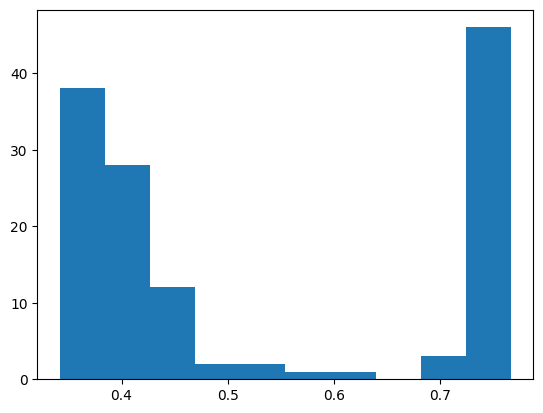

In [ ]:
# Normalizing data by taking cube root
X_cbrt = np.cbrt(X)

for i in X_cbrt.columns:
    plt.hist(X_cbrt[i])
    plt.show()

We tried normalizing the data through various techniques but to no avail.

### Multicollinearity

Checking the multicollienarity among the independent variables and reducing high multicollinearity through step-wise estimation process. VIF ranging from 0 to 10  is acceptable.

In [ ]:
#Since we are not considering the non-numeric columns(Campaign name,Month,Ad name) and the dependent variable(Post engagement), we drop them.
X = df_two.drop(['Campaign name','Month','Ad name','Post engagement'], axis = 1)

# VIF of the dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                feature         VIF
0              Platform   10.525453
1                 Reach  203.295792
2             Frequency   81.003125
3           Impressions  200.657049
4             ThruPlays   34.826841
5    Cost per ThruPlays   32.466134
6    Amount spent (INR)   35.165640
7           Link clicks    2.902710
8          Clicks (all)    9.335110
9    Video plays at 25%   35.037151
10   Video plays at 50%  195.998861
11   Video plays at 75%  246.276363
12  Video plays at 100%   44.759235
13                  VTR   26.685877


In [ ]:
# Dropping Video plays at 75% column from X as it has the highest multicollinearity i.e. 246 in X
X1 = df_two.drop(['Campaign name','Month','Ad name','Post engagement','Video plays at 75%'], axis = 1)

# VIF of the dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X1.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                          for i in range(len(X1.columns))]

print(vif_data)

                feature         VIF
0              Platform   10.504272
1                 Reach  203.114882
2             Frequency   80.980407
3           Impressions  199.529012
4             ThruPlays   30.515820
5    Cost per ThruPlays   32.385415
6    Amount spent (INR)   35.150310
7           Link clicks    2.874932
8          Clicks (all)    9.319699
9    Video plays at 25%   32.270100
10   Video plays at 50%   50.229982
11  Video plays at 100%   26.542618
12                  VTR   26.685874


In [ ]:
# Dropping Reach column from X1 as it has the highest multicollinearity i.e. 203 in X1
X2 = df_two.drop(['Campaign name','Month','Ad name','Post engagement','Reach','Video plays at 75%'], axis = 1)

# VIF of the dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X2.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X2.values, i)
                          for i in range(len(X2.columns))]

print(vif_data)

                feature        VIF
0              Platform  10.245067
1             Frequency  76.554677
2           Impressions  29.260486
3             ThruPlays  29.469749
4    Cost per ThruPlays  29.325395
5    Amount spent (INR)  34.166528
6           Link clicks   2.808725
7          Clicks (all)   9.300349
8    Video plays at 25%  28.837890
9    Video plays at 50%  49.480672
10  Video plays at 100%  26.344133
11                  VTR  25.455806


In [ ]:
# Dropping Frequency column from X2 as it has the highest multicollinearity i.e. 76 in X2
X3 = df_two.drop(['Campaign name','Month','Ad name','Post engagement','Video plays at 75%','Reach','Frequency'], axis = 1)

# VIF of the dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X3.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X3.values, i)
                          for i in range(len(X3.columns))]

print(vif_data)

                feature        VIF
0              Platform   9.335907
1           Impressions  22.823932
2             ThruPlays  28.419970
3    Cost per ThruPlays   4.876706
4    Amount spent (INR)  26.998079
5           Link clicks   2.710587
6          Clicks (all)   8.611006
7    Video plays at 25%  28.794753
8    Video plays at 50%  48.536872
9   Video plays at 100%  25.239415
10                  VTR  17.750352


In [ ]:
# Dropping Video plays at 50% column from X3 as it has the highest multicollinearity i.e. 48 in X3
X4 = df_two.drop(['Campaign name','Month','Ad name','Post engagement','Video plays at 75%','Reach','Frequency','Video plays at 50%'], axis = 1)

# VIF of the dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X4.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X4.values, i)
                          for i in range(len(X4.columns))]

print(vif_data)

               feature        VIF
0             Platform   9.319929
1          Impressions  22.793640
2            ThruPlays  28.203012
3   Cost per ThruPlays   4.875927
4   Amount spent (INR)  26.992068
5          Link clicks   2.658897
6         Clicks (all)   8.233764
7   Video plays at 25%  16.322590
8  Video plays at 100%  11.540244
9                  VTR  17.203426


In [ ]:
# Dropping ThruPlays column from X4 as it has the highest multicollinearity i.e. 28 in X4
X5 = df_two.drop(['Campaign name','Month','Ad name','Post engagement','Video plays at 75%','Reach','Frequency','Video plays at 50%','ThruPlays'], axis = 1)

# VIF of the dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X5.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X5.values, i)
                          for i in range(len(X5.columns))]

print(vif_data)

               feature        VIF
0             Platform   8.454640
1          Impressions  22.389893
2   Cost per ThruPlays   4.732958
3   Amount spent (INR)  21.816972
4          Link clicks   2.634689
5         Clicks (all)   8.141152
6   Video plays at 25%  15.246625
7  Video plays at 100%   9.686948
8                  VTR  16.709719


In [ ]:
# Dropping Impressions column from X5 as it has the highest multicollinearity i.e. 22 in X5
X6 = df_two.drop(['Campaign name','Month','Ad name','Post engagement','Video plays at 75%','Reach','Frequency','Video plays at 50%','ThruPlays','Impressions'], axis = 1)

#VIF of the dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X6.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X6.values, i)
                          for i in range(len(X6.columns))]

print(vif_data)

               feature        VIF
0             Platform   8.452766
1   Cost per ThruPlays   4.732574
2   Amount spent (INR)  11.063994
3          Link clicks   2.608813
4         Clicks (all)   7.380993
5   Video plays at 25%  15.107710
6  Video plays at 100%   9.212951
7                  VTR  16.320440


In [ ]:
# Dropping VTR column from X6 as it has the highest multicollinearity i.e.16 in X6
X7 = df_two.drop(['Campaign name','Month','Ad name','Post engagement','Video plays at 75%','Reach','Frequency','Video plays at 50%','ThruPlays','Impressions','VTR'], axis = 1)

#VIF of the dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X7.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X7.values, i)
                          for i in range(len(X7.columns))]

print(vif_data)

               feature        VIF
0             Platform   2.465241
1   Cost per ThruPlays   4.723694
2   Amount spent (INR)  10.258476
3          Link clicks   2.534481
4         Clicks (all)   5.598715
5   Video plays at 25%  14.286996
6  Video plays at 100%   8.916375


In [ ]:
# Dropping Video plays at 25% column from X7 as it has the highest multicollinearity i.e.14 in X7
X8 = df_two.drop(['Campaign name','Month','Ad name','Post engagement','Video plays at 75%','Reach','Frequency','Video plays at 50%','ThruPlays','Impressions','VTR','Video plays at 25%'], axis = 1)

#VIF of the dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X8.columns

# Calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X8.values, i)
                          for i in range(len(X8.columns))]

print(vif_data)

               feature       VIF
0             Platform  2.463575
1   Cost per ThruPlays  4.355358
2   Amount spent (INR)  7.381210
3          Link clicks  2.532620
4         Clicks (all)  5.507714
5  Video plays at 100%  3.354438


Through step-wise estimination method, we are left with only 6 columns

### LDA

In [ ]:
# Checking the equality of covariance matrix with Box-M test
pg.box_m(df_two, dvs=['Impressions', 'Cost per ThruPlays', 'Link clicks','Clicks (all)','Video plays at 100%','VTR'], group='Post engagement')

,Chi2,df,pval,equal_cov
box,80.300852,21.0,7.191530e-09,False


The covariance matrices are not equal

In [ ]:
# Checking how many discriminant components explain the variability between classes
lda = LDA()
X_lda = lda.fit_transform(X8,y)
np_cum_lda = np.cumsum(lda.explained_variance_ratio_)
df_cum_lda = pd.DataFrame({'Component':[i for i in range(1,np_cum_lda.shape[0]+1)],'explained_variance_ratio':lda.explained_variance_ratio_,'cum_explained_variance_ratio':np_cum_lda})
print(df_cum_lda)
filter = df_cum_lda[df_cum_lda.cum_explained_variance_ratio>0.8].iloc[0]
component = int(filter.Component)
cum_var = float(filter.cum_explained_variance_ratio)
print(f"\n{component} Discriminant Components explain {round(cum_var,4)*100}% of variability between CLASSES")

   Component  explained_variance_ratio  cum_explained_variance_ratio
0          1                       1.0                           1.0

1 Discriminant Components explain 100.0% of variability between CLASSES


0.9444444444444444


Text(0, 0.5, 'True Positive Rate')

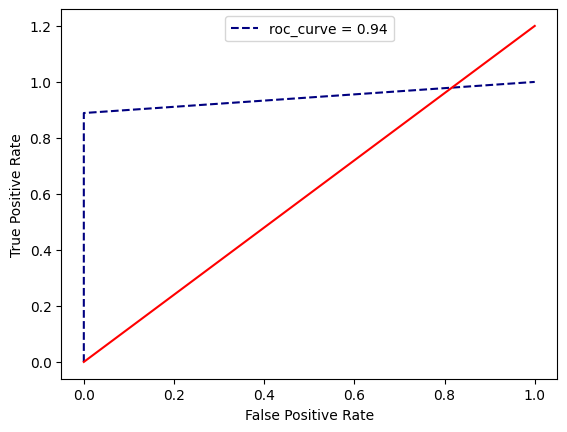

In [ ]:
# Preprocess the dataset and divide into train and test
X = X8
y = df_two['Post engagement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17102023)

#creating our linear discrimanant analysis model
clf = LDA()

#checking for the model accuracy using score method
clf.fit(X_train, y_train).score(X_train, y_train)

y_pred = clf.predict(X_test)

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)

#calculating area under the curve(AUC)
auc = metrics.auc(fpr, tpr)
print(auc)

#plotting our ROC curve using above terminologies
plt.title("Linear Discriminant Analysis")

plt.clf()

#plotting for roc curve
plt.plot(fpr, tpr, color="navy", linestyle="--", label = "roc_curve = %0.2f"% auc)
plt.legend(loc = "upper center")

#assigning the axis values
plt.plot([0,1], [0,1.2], ls = '-', color="red")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

In [ ]:
print(clf.fit(X_train, y_train).score(X_train, y_train))

0.8490566037735849


Accuracy : 0.9629629629629629
[[18  0]
 [ 1  8]]


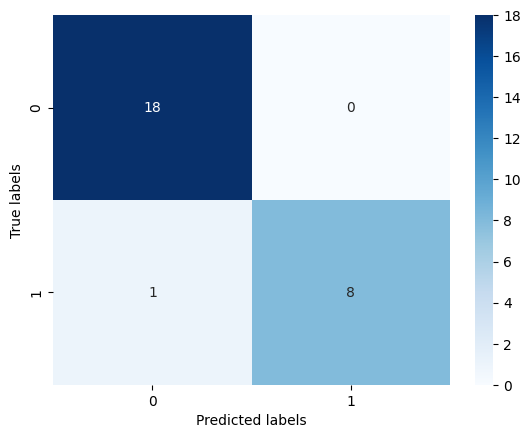

In [ ]:
# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)
sns.heatmap(conf_m, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Random Forest

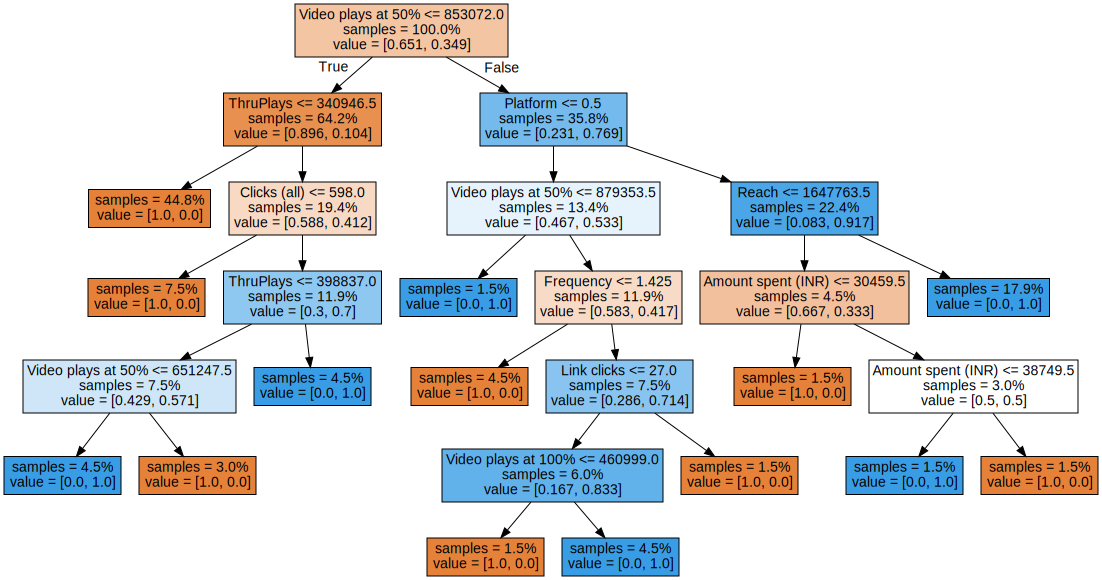

In [ ]:
# Export the first decision tree from the forest
for i in range(1):
    tree = classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X_train.columns,
                               filled=True,
                               impurity=False,
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

Accuracy : 0.9629629629629629
[[19  0]
 [ 1  7]]


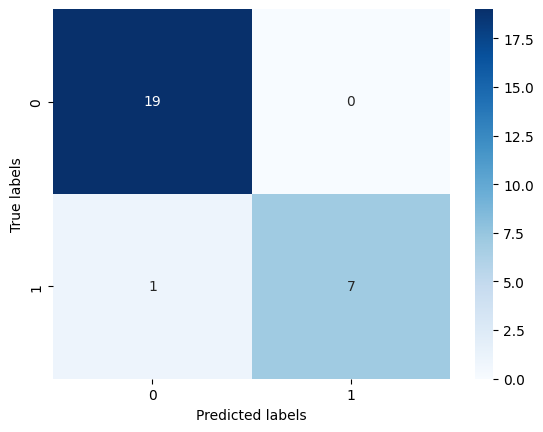

In [ ]:
# Preprocess the dataset and divide into train and test
X = df_two.drop(['Campaign name','Month','Ad name','Post engagement'], axis = 1)
y = df_two['Post engagement']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# classify using random forest classifier
classifier = RandomForestClassifier(random_state=0, criterion="gini")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)
sns.heatmap(conf_m, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()